# Read output files

In [1]:
import awkward as ak
import numpy as np
import os
import pandas as pd

In [2]:
basedir = {
    '2016pre': {
        r'Top+fake $\gamma$': ['../condor/output/mc/2016pre/ST/', '../condor/output/mc/2016pre/TTJets/',],
        r'Top+$\gamma$': ['../condor/output/mc/2016pre/TTGJets/',],
        r'Z+fake $\gamma$': ['../condor/output/mc/2016pre/ZJetsToNuNu/', '../condor/output/mc/2016pre/ZJetsToLL/', '../condor/output/mc/2016pre/ZJetsToQQ/',],
        r'Z+$\gamma$': ['../condor/output/mc/2016pre/ZGToLLG/', '../condor/output/mc/2016pre/ZGToJJG/',],
        r'W+fake $\gamma$': ['../condor/output/mc/2016pre/WJetsToLNu/', '../condor/output/mc/2016pre/WJetsToQQ/',],
        r'W+$\gamma$': ['../condor/output/mc/2016pre/WGToLNuG/', '../condor/output/mc/2016pre/WGToJJG/',],
        r'QCD+fake $\gamma$': ['../condor/output/mc/2016pre/QCD/'],
        r'QCD+$\gamma$': ['../condor/output/mc/2016pre/GJets/'],
        r'$Z^\mathrm{\prime}(2TeV)\to H\gamma$': ['../condor/output/mc/2016pre/ZpToHG/ZpToHGamma_M2000/'],
        'data': ['../condor/output/data/2016pre/SinglePhoton/'],
    },
    '2016post': {
        r'Top+fake $\gamma$': ['../condor/output/mc/2016post/ST/', '../condor/output/mc/2016post/TTJets/',],
        r'Top+$\gamma$': ['../condor/output/mc/2016post/TTGJets/',],
        r'Z+fake $\gamma$': ['../condor/output/mc/2016post/ZJetsToNuNu/', '../condor/output/mc/2016post/ZJetsToLL/', '../condor/output/mc/2016post/ZJetsToQQ/',],
        r'Z+$\gamma$': ['../condor/output/mc/2016post/ZGToLLG/', '../condor/output/mc/2016post/ZGToJJG/',],
        r'W+fake $\gamma$': ['../condor/output/mc/2016post/WJetsToLNu/', '../condor/output/mc/2016post/WJetsToQQ/',],
        r'W+$\gamma$': ['../condor/output/mc/2016post/WGToLNuG/', '../condor/output/mc/2016post/WGToJJG/',],
        r'QCD+fake $\gamma$': ['../condor/output/mc/2016post/QCD/'],
        r'QCD+$\gamma$': ['../condor/output/mc/2016post/GJets/'],
        r'$Z^\mathrm{\prime}(2TeV)\to H\gamma$': ['../condor/output/mc/2016post/ZpToHG/ZpToHGamma_M2000/'],
        'data': ['../condor/output/data/2016post/SinglePhoton/'],
    },
    '2017': {
        r'Top+fake $\gamma$': ['../condor/output/mc/2017/ST/', '../condor/output/mc/2017/TTJets/',],
        r'Top+$\gamma$': ['../condor/output/mc/2017/TTGJets/',],
        r'Z+fake $\gamma$': ['../condor/output/mc/2017/ZJetsToNuNu/', '../condor/output/mc/2017/ZJetsToLL/', '../condor/output/mc/2017/ZJetsToQQ/',],
        r'Z+$\gamma$': ['../condor/output/mc/2017/ZGToLLG/', '../condor/output/mc/2017/ZGToJJG/',],
        r'W+fake $\gamma$': ['../condor/output/mc/2017/WJetsToLNu/', '../condor/output/mc/2017/WJetsToQQ/',],
        r'W+$\gamma$': ['../condor/output/mc/2017/WGToLNuG/', '../condor/output/mc/2017/WGToJJG/',],
        r'QCD+fake $\gamma$': ['../condor/output/mc/2017/QCD/'],
        r'QCD+$\gamma$': ['../condor/output/mc/2017/GJets/'],
        r'$Z^\mathrm{\prime}(2TeV)\to H\gamma$': ['../condor/output/mc/2017/ZpToHG/ZpToHGamma_M2000/'],
        'data': ['../condor/output/data/2017/SinglePhoton/'],
    },
    '2018': {
        r'Top+$\gamma$': ['../condor/output/mc/2018/TTGJets/',],
        r'Z+$\gamma$': ['../condor/output/mc/2018/ZGToLLG/', '../condor/output/mc/2018/ZGToJJG/',],
        r'W+$\gamma$': ['../condor/output/mc/2018/WGToLNuG/', '../condor/output/mc/2018/WGToJJG/',],
        r'fake $\gamma$ events': ['../condor/output/mc/2018/ST/', '../condor/output/mc/2018/TTJets/', '../condor/output/mc/2018/ZJetsToNuNu/', '../condor/output/mc/2018/ZJetsToLL/', '../condor/output/mc/2018/ZJetsToQQ/', '../condor/output/mc/2018/WJetsToLNu/', '../condor/output/mc/2018/WJetsToQQ/', '../condor/output/mc/2018/QCD/'],
        r'QCD+$\gamma$': ['../condor/output/mc/2018/GJets/'],
        r'$Z^\mathrm{\prime}(1TeV)\to H\gamma$': ['../condor/output/mc/2018/ZpToHG/ZpToHGamma_M1000/'],
        r'$Z^\mathrm{\prime}(2TeV)\to H\gamma$': ['../condor/output/mc/2018/ZpToHG/ZpToHGamma_M2000/'],
        r'$Z^\mathrm{\prime}(3TeV)\to H\gamma$': ['../condor/output/mc/2018/ZpToHG/ZpToHGamma_M3000/'],
        'data': ['../condor/output/data/2018/EGamma/'],
    },
}
BKG = set([k for k in basedir['2018'].keys() if not (r'H\gamma' in k or k=='data')])
SIG_COLOR = {
    r'$Z^\mathrm{\prime}(1TeV)\to H(bb)\gamma$': 'red',
    r'$Z^\mathrm{\prime}(2TeV)\to H(bb)\gamma$': 'blue',
    r'$Z^\mathrm{\prime}(3TeV)\to H(bb)\gamma$': 'gold',
}

filepath={year: {c: [] for c in basedir[year]} for year in basedir}
for year, paths in basedir.items():
    for mc, folders in paths.items():
        for folder in folders:
            for (current_path, dirs, files) in os.walk(folder):
                for f in files:
                    if f.endswith('.parq'):
                        filepath[year][mc].append(os.path.join(current_path, f))

In [3]:
events = {year: {k: [] for k in filepath[year]} for year in filepath}
for year in filepath:
    for k, v in filepath[year].items():
        for f in v:
            if os.path.getsize(f) == 0 or len(ak.from_parquet(f))==0:
                continue
            array = ak.from_parquet(f)
            if len(array)>0:
                events[year][k].append(array)
        if len(events[year][k]) > 0:
            events[year][k] = ak.concatenate(events[year][k], axis=0)

weight={y: {c: events[y][c].event_final_weight for c in events[y] if c!='data' and len(events[y][c])>0} for y in events}
del events['2016pre'][r'$Z^\mathrm{\prime}(2TeV)\to H\gamma$']
del events['2016post'][r'$Z^\mathrm{\prime}(2TeV)\to H\gamma$']

In [4]:
events['2018'][r'W+$\gamma$'].event_genWeight, events['2018'][r'W+$\gamma$'].event_final_weight

(<Array [1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, -1, 1, -1] type='83798 * ?float32'>,
 <Array [2.38, 2.21, 2.28, ..., -0.127, 0.146, -0.119] type='83798 * float64'>)

In [5]:
for y in events:
    for i in events[y]:
        if i=='data' or len(events[y][i])==0:
            continue
        print(y, i, set(events[y][i].event_final_weight), sep='\t')

2018	Top+$\gamma$	{0.10250588438294206, -0.1384689609983567, 0.12571640466927825, -0.09951996190823365, 0.09951996190823365, -0.10250588438294206, -0.12571640466927825, 0.1440447609673876, 0.1384689609983567, -0.1440447609673876, 0.10997982072250025, -0.1165999195326448, 0.11474165849825636, 0.11385711803210398, 0.11537711900917393, -0.11948202336626078, -0.07331259952621892, 0.08310710582684201, 0.1413937072101504, -0.1283530119105962, 0.11806943775033354, 0.11403214536865461, 0.11723349454534351, 0.11230280317581312, 0.11534650580354525, -0.1272577027260444, -0.10396580615233539, -0.14054877319083278, -0.13276299574625547, -0.062290709420638156, 0.1283530119105962, -0.11641070939262561, 0.09189320411079342, -0.09672953981780515, -0.14160979496629403, 0.1360969538633481, 0.10603813316497357, 0.09994867883903827, 0.12569816522768437, -0.14559414862290967, -0.09576382902749353, -0.11756144322438827, -0.13912528344512215, -0.13677056479779698, 0.1556655868414339, 0.11754813493534222, 0.1

2018	fake $\gamma$ events	{0.2873445660005842, 0.5191348606050639, -0.5191348606050639, 3.4285184459657962, 0.5645978462539496, 5.695701609607088, 0.044716501045751755, 0.5393735706704206, 5.786646285868962, 0.08824087024634863, 4.411902383359557, 4.867919111750677, 6.4425839338392805, 5.644265172509606, 5.474819371027664, 6.374109848739739, 8.05503633174482, 17.1171107555995, 9.15369414139139, 10.185363744474117, 29.70988894648275, 30.347043164787, 29.120462914032046, 32.483564301932006, 33.83168461027026, 33.59767802407169, 31.537341504171188, 36.562389436150674, 37.25459005007942, 38.19436694697496, 36.55268827568058, 40.869391226665876, 38.560079206579964, 37.01406405515352, 40.32728261701152, 36.889928678261725, 37.15066487478231, 39.833073558534466, 43.1283938354355, 0.03675344896125312, 0.03501719024492902, 0.034347905637840646, 42.523838973301174, 43.01459246405202, 44.176946121522526, 0.24851472734685134, 0.16955356318199935, 0.025495321589950527, 0.050879387511773934, 0.00603

# Decomposite signal

In [6]:
def decomposite(signal: ak.Array):
    HWW_decay_mode = ak.fill_none(signal['gen_HWW_decay_mode'], 0)
    
    signal['HWW_4q'] = signal['gen_ZpToH(WW)Gamma'] & (HWW_decay_mode >= 32)
    
    signal['HWW_qqlv'] = signal['gen_ZpToH(WW)Gamma'] & (HWW_decay_mode > 16) & (HWW_decay_mode < 32)
    
    signal['HWW_lvlv'] = signal['gen_ZpToH(WW)Gamma'] & (HWW_decay_mode <= 16)
    
    return signal

DECOMPOSITE = True
if DECOMPOSITE:
    y='2018'
    for c in list(events[y].keys()):
        if r'H\gamma' in c:
            events[y].update({c: decomposite(events[y][c])})
            events[y][c.replace(r'H\gamma', r'H(WW)\gamma')] = events[y][c][events[y][c]['gen_ZpToH(WW)Gamma']]
            events[y][c.replace(r'H\gamma', r'H(bb)\gamma')] = events[y][c][events[y][c]['gen_ZpToH(bb)Gamma']]
            weight[y][c.replace(r'H\gamma', r'H(WW)\gamma')] = weight[y][c][events[y][c]['gen_ZpToH(WW)Gamma']]
            weight[y][c.replace(r'H\gamma', r'H(bb)\gamma')] = weight[y][c][events[y][c]['gen_ZpToH(bb)Gamma']]

events

{'2016pre': {'Top+fake $\\gamma$': [],
  'Top+$\\gamma$': [],
  'Z+fake $\\gamma$': [],
  'Z+$\\gamma$': [],
  'W+fake $\\gamma$': [],
  'W+$\\gamma$': [],
  'QCD+fake $\\gamma$': [],
  'QCD+$\\gamma$': [],
  'data': []},
 '2016post': {'Top+fake $\\gamma$': [],
  'Top+$\\gamma$': [],
  'Z+fake $\\gamma$': [],
  'Z+$\\gamma$': [],
  'W+fake $\\gamma$': [],
  'W+$\\gamma$': [],
  'QCD+fake $\\gamma$': [],
  'QCD+$\\gamma$': [],
  'data': []},
 '2017': {'Top+fake $\\gamma$': [],
  'Top+$\\gamma$': [],
  'Z+fake $\\gamma$': [],
  'Z+$\\gamma$': [],
  'W+fake $\\gamma$': [],
  'W+$\\gamma$': [],
  'QCD+fake $\\gamma$': [],
  'QCD+$\\gamma$': [],
  '$Z^\\mathrm{\\prime}(2TeV)\\to H\\gamma$': [],
  'data': []},
 '2018': {'Top+$\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='12692 * {AK8jet_rankT...'>,
  'Z+$\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='45337 * {AK8jet_rankT...'>,
  'W+$\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='83798 *

# Start plotting

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
from cycler import cycler

use_helvet = False ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

def flow(hist: bh.Histogram, overflow: bool=True, underflow: bool=False):
    h, var = hist.view(flow=(overflow | underflow)).value, hist.view(flow=(overflow | underflow)).variance
    if overflow: # h, var also include underflow bins but in plots usually no underflow data
        # And we've filled None with -999, so we shouldn't show underflow data (mostly from filled None)
        h[-2] += h[-1]; var[-2] += var[-1]
    if underflow:
        h[1] += h[0]; var[1] += var[0]
    if overflow or underflow:
        h, var = h[1:-1], var[1:-1]
    return np.abs(h), var

def error_bar(h, var, type='data'):
    from scipy.interpolate import CubicSpline
    if type == 'data':
        number = h
    elif type == 'mc':  # h = k*N, var = k^2*N, std = k*sqrt(N)
        number = h**2 / var
    else:
        raise ValueError("type should be 'data' or 'mc'! ")
    center = range(11)
    up = np.array([1.84, 3.30, 4.64, 5.92, 7.16, 8.38, 9.58, 10.77, 11.95, 13.11, 14.27]) - center
    down = center - np.array([0, 0.17, 0.71, 1.37, 2.09, 2.84, 3.62, 4.42, 5.23, 6.06, 6.89])
    cs_up = CubicSpline(x=center, y=up)
    cs_down = CubicSpline(x=center, y=down)
    
    Garwood = (number>0)&(number<10)
    poison_error_bar = np.sqrt(number)
    up_error_bar = np.copy(poison_error_bar)
    down_error_bar = np.copy(poison_error_bar)
    up_error_bar[Garwood] = cs_up(number[Garwood])
    down_error_bar[Garwood] = cs_down(number[Garwood])
    if type == 'mc':
        up_error_bar *= var/h
        down_error_bar *= var/h
    return np.array([down_error_bar, up_error_bar])

In [8]:
for k in events['2018'].keys():
    print(k, ak.sum(events['2018'][k].event_weight))

Top+$\gamma$ 3768.1329351342647
Z+$\gamma$ 23821.73471921921
W+$\gamma$ 45765.978879660746
fake $\gamma$ events 5879.985694668705
QCD+$\gamma$ 315933.4824818434
$Z^\mathrm{\prime}(1TeV)\to H\gamma$ 56862.96580146838
$Z^\mathrm{\prime}(2TeV)\to H\gamma$ 78095.26825899328
$Z^\mathrm{\prime}(3TeV)\to H\gamma$ 80396.39694985645
data 385903.0
$Z^\mathrm{\prime}(1TeV)\to H(WW)\gamma$ 12514.336583527085
$Z^\mathrm{\prime}(1TeV)\to H(bb)\gamma$ 32926.46323368583
$Z^\mathrm{\prime}(2TeV)\to H(WW)\gamma$ 16593.88230514005
$Z^\mathrm{\prime}(2TeV)\to H(bb)\gamma$ 45211.70333903858
$Z^\mathrm{\prime}(3TeV)\to H(WW)\gamma$ 17430.334945091265
$Z^\mathrm{\prime}(3TeV)\to H(bb)\gamma$ 46080.666249551505


## Data comparison

In [9]:
def data_compare_plot(arrays, plot_name: str, x_name: str, cuts=None, bins=40, x_min=0, x_max=3000, density=True, overflow=True, underflow=False):
    bin_width = (x_max-x_min)/bins
    if cuts:
        arrays = {k: v[cuts[k]] for k, v in arrays.items()}

    ## canvas initializing
    # colorlist=['red', 'blue', 'green', 'black', 'cyan', 'darkorange', 'darkviolet', 'SlateGray', 'HotPink', 'LightSkyBlue']
    # mpl.rcParams['axes.prop_cycle'] = cycler(color=colorlist)
    # f, ax = plt.subplots()
    f = plt.figure(figsize=(9, 9))
    ax=plt.gca()
    plt.grid()
    hep.cms.label(data=True, ax=ax, fontsize=18)
    
    ## analyze

        
    ## plot
    # mpl.rcParams['axes.prop_cycle'] = cycler(color=['red', 'blue', 'green', 'darkorange', 'cyan', 'HotPink', 'darkviolet', 'SlateGray', 'black', 'LightSkyBlue'])
    for (k, v) in arrays.items():
        hist = bh.Histogram(bh.axis.Regular(bins, x_min, x_max), storage=bh.storage.Weight())
        hist.fill(v)
        h, var = flow(hist=hist, overflow=overflow, underflow=underflow)
        hep.histplot(h, bins=hist.axes[0].edges, xerr=bin_width/2, yerr=error_bar(h, var, type='data'), label=k, histtype='step', density=density, stack=False, ax=ax, linewidth=2)
    # or you can specify color='blue' in the above function to cover colorlist (you could comment out colorlist too) 

    ## axises
    ax.set_xlabel(x_name, fontsize=22, ha='right', x=1)
    ax.set_xlim(x_min, x_max)
    if 'eta' in plot_name:
        ax.set_ylim(1e-2, ax.get_ylim()[1]*5)
    else:
        ax.set_ylim(1e-8, ax.get_ylim()[1]*5)
    ax.set_yscale('log')
    #ax.ticklabel_format(useOffset=False, style='scientific')
    ax.tick_params(axis='both', which='major', labelsize=16)
    #x_major_locator=plt.MultipleLocator(bin_width*8 if variable=='fj_gen_mass' else bin_width*2)
    #y_major_locator=MultipleLocator(1)
    #ax.xaxis.set_major_locator(x_major_locator)
    #ax.yaxis.set_major_locator(y_major_locator)
    if density==False:
        ax.set_ylabel('Events', fontsize=20, ha='right', y=1)
    elif density==True:    
        ax.set_ylabel('A.U.', fontsize=20, ha='right', y=1)

    plt.xticks(size=16)
    plt.yticks(size=16)

    ## title, text and legend
    # plt.title('ROC Curve of HWW4q vs. QCD', fontsize=24,color="black")
    ax.legend(loc="best", ncol=2, frameon=False, fontsize=18)
    # plt.text(0.96*ax.get_xlim()[1], ax.get_ylim()[1]*0.72,"At "+r"$\mathrm{m^{gen}_{H}=}$"+f"{Higgsmass} GeV", fontsize=24, color="black", ha='right')

    ## finalizing
    suffix = '_AU' if density else ''
    if not os.path.exists('./plots'):
        os.makedirs('./plots')
    plt.savefig(f"./plots/data_compare_{plot_name}{suffix}.pdf", bbox_inches='tight')
    plt.show()

In [ ]:
arrays={k: events[k]['data'].photon_pt for k in events}
data_compare_plot(arrays, 'photon_pt', x_name=r'$p_T^{\gamma}$')

arrays={k: events[k]['data'].photon_eta for k in events}
data_compare_plot(arrays, 'photon_eta', x_name=r'$\eta_{\gamma}$', x_min=-3, x_max=3)

arrays={k: events[k]['data'].photon_phi for k in events}
data_compare_plot(arrays, 'photon_phi', x_name=r'$\phi_\gamma$', x_min=-4, x_max=4)

arrays={k: events[k]['data'].AK8jet_pt for k in events}
data_compare_plot(arrays, 'AK8jet_pt', x_name=r'$p_T^j$')

arrays={k: events[k]['data'].AK8jet_eta for k in events}
data_compare_plot(arrays, 'AK8jet_eta', x_name=r'$\eta_j$', x_min=-3, x_max=3)

arrays={k: events[k]['data'].AK8jet_phi for k in events}
data_compare_plot(arrays, 'AK8jet_phi', x_name=r'$\phi_j$', x_min=-4, x_max=4)

arrays={k: events[k]['data'].AK8jet_msoftdrop for k in events}
data_compare_plot(arrays, 'AK8jet_msoftdrop', x_name=r'$m_{SD}^j$', x_min=0, x_max=300)

AttributeError: 'list' object has no attribute 'photon_pt'

## Data-MC comparison

In [9]:
from matplotlib.cm import get_cmap

hep.style.use("CMS")
#mpl.rcParams['axes.prop_cycle'] = cycler(color=get_cmap("tab20").colors)
#print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

def data_mc_compare_plot(arrays, weight, plot_name: str, x_name: str, cuts=None, year='2018', bins=40, x_min=0, x_max=2000, density=False, overflow=True, underflow=False, fraction_log=False, mass_window=False):
    LUMI = {"2016pre": 19.52, "2016post": 16.81, "2017": 41.48, "2018": 59.83,}
    bin_width = (x_max-x_min)/bins
    if cuts:
        arrays = {k: v[cuts[k]] for k, v in arrays.items()}
        
    ## canvas initializing
    f = plt.figure(figsize=(9, 10))
    gs = mpl.gridspec.GridSpec(3, 1, height_ratios=[6, 1, 1], hspace=0.08)
    ax = f.add_subplot(gs[0])
    plt.grid()
    hep.cms.label(data=True, year=year, ax=ax, lumi=LUMI[year], fontsize=18, llabel='Preliminary')
    ## Ratio panel
    ax1 = f.add_subplot(gs[1])
    ax2 = f.add_subplot(gs[2])
    ax1.grid()
    ax2.grid()
    
    ## analyze
    stacked = {'h': {}, 'var': {}}
    individual = {'h': {}, 'var': {}}
    
    for (k,v) in arrays.items():
        hist = bh.Histogram(bh.axis.Regular(bins, x_min, x_max), storage=bh.storage.Weight())
        if 'delta_phi' in plot_name:
            values = np.min([v, 2*np.pi-v], axis=0)
        values = ak.fill_none(v, -999)
        
        if k!='data' and weight is not None:
            hist.fill(values, weight=weight[k])
        else:
            hist.fill(values)
        h, var = flow(hist=hist, overflow=overflow, underflow=underflow)
        
        if k in BKG: 
            stacked['h'][k] = h
            stacked['var'][k] = var
        else:
            individual['h'][k] = h
            individual['var'][k] = var
        
    ## plot
    ax1.plot([x_min,x_max], [1,1], color='black', linestyle='dashed')
    # or you can specify color='blue' in the above function to cover colorlist (you could comment out colorlist too)
    if len(stacked['h'].keys())>0:
        hep.histplot(list(stacked['h'].values()), bins=hist.axes[0].edges, label=list(stacked['h'].keys()), histtype='fill', density=density, stack=True, linewidth=2, ax=ax)
        bkg_h = np.sum(list(stacked['h'].values()), axis=0)
        # we usually don't care error of background MC cuz the stats is very large (relative error is very small compared with signal and data)
    for (k,h) in individual['h'].items():
        if k=='data':
            err = error_bar(h, individual['var'][k], type='data')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, color='black', histtype='errorbar', density=density, stack=False, ax=ax)
            hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
        elif k in SIG_COLOR:  # signal
            err = error_bar(h, individual['var'][k], type='mc')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, histtype='step', density=density, stack=False, linewidth=2, ax=ax, color=SIG_COLOR[k])
            y = h / np.sqrt(bkg_h + 1)
            hep.histplot(y, bins=hist.axes[0].edges, yerr=err/np.sqrt(bkg_h+1), label=k, histtype='step', density=density, stack=False, ax=ax2, color=SIG_COLOR[k])
            if mass_window:
                mass_center = float(k.split('(')[1][:1])*1e3
                mass_std = ak.std(arrays[k], weight=weight[k])
                ax.arrow(x=mass_center - 2*mass_std, y=np.max(h)/10, dx=0, dy=1e-3-np.max(h)/10, length_includes_head=True, color='black', linewidth=2, linestyle='dashed')
                ax.arrow(x=mass_center + 2*mass_std, y=np.max(h)/10, dx=0, dy=1e-3-np.max(h)/10, length_includes_head=True, color='black', linewidth=2, linestyle='dashed')


    ## axises
    ax.set_xlim(x_min, x_max)
    # ax.set_xticklabels([])
    ax.set_ylim(1e-3 if not density else 0, ax.get_ylim()[1]*(1e2 if not density else 1.2))
    if not density:
        ax.set_yscale('log')
    # ax.ticklabel_format(useOffset=False, style='scientific')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='x', which='major', labelsize=0)
    # x_major_locator=plt.MultipleLocator(bin_width*8 if variable=='fj_gen_mass' else bin_width*2)
    # y_major_locator=MultipleLocator(1)
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    if density==False:
        ax.set_ylabel('Events', fontsize=20, ha='right', y=1)
    elif density==True:    
        ax.set_ylabel('A.U.', fontsize=20, ha='right', y=1)
    
    ax1.set_xlim(x_min, x_max)
    ax1.set_xticklabels([])
    if fraction_log:
        ax1.set_ylim(1e-1, 1e1)
        ax1.set_yscale('log')
    else:
        ax1.set_ylim(0, 2)
    ax1.set_ylabel(r'$\frac{Data}{bkg\ MC}$', ha='center', fontsize=24)
    #ax1.ticklabel_format(useOffset=False, style='plain')
    ax1.tick_params(axis='both', which='major', labelsize=16)
    
    #ax2.set_yscale('log')
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(0, ax2.get_ylim()[1]*1.2)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    ax2.set_xlabel(x_name, fontsize=22, ha='right', x=1)
    ax2.set_ylabel(r'$S/\sqrt{B+1}$', ha='center', fontsize=16)
    ax2.ticklabel_format(useOffset=False, style='plain')
    ax2.tick_params(axis='both', which='major', labelsize=16)

    plt.xticks(size=16)
    plt.yticks(size=16)

    ## title, text and legend
    # plt.title('ROC Curve of HWW4q vs. QCD', fontsize=24,color="black")
    ax.legend(loc="best", ncol=3, frameon=False, fontsize=15)
    # plt.text(0.96*ax.get_xlim()[1], ax.get_ylim()[1]*0.72,"At "+r"$\mathrm{m^{gen}_{H}=}$"+f"{Higgsmass} GeV", fontsize=24, color="black", ha='right')

    ## finalizing
    suffix = '_AU' if density else ''
    if not os.path.exists('./plots'):
        os.makedirs('./plots')
    plt.savefig(f"./plots/{year}_{plot_name}{suffix}.pdf", bbox_inches='tight')
    plt.show()

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid va

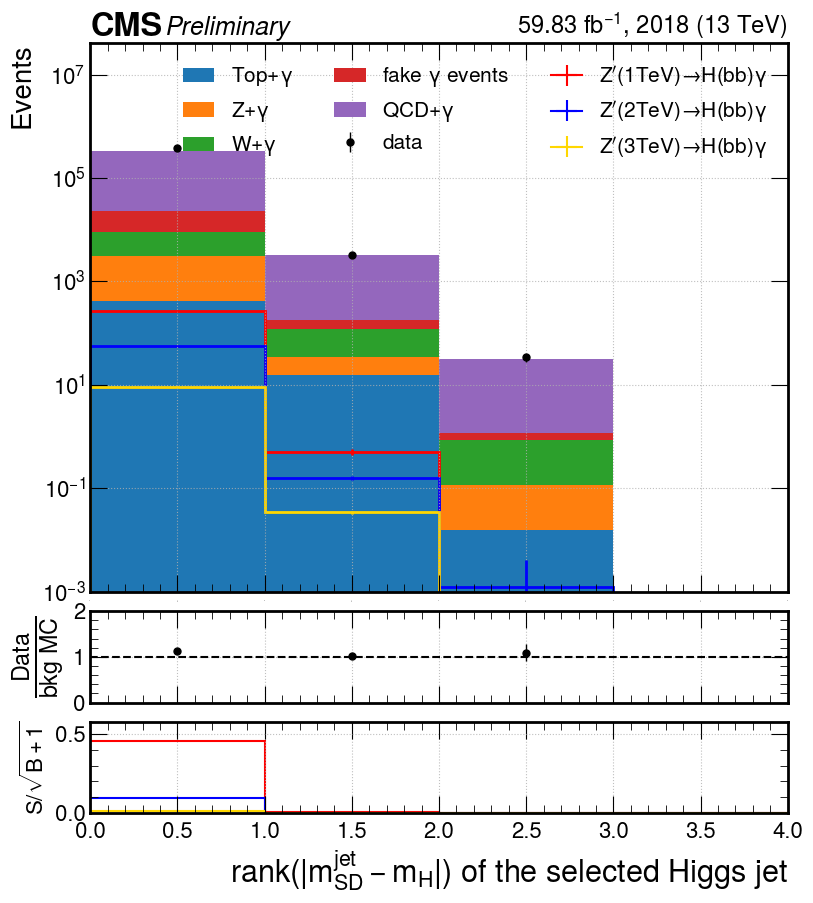

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: divide by zero encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/home/dfu/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_ba

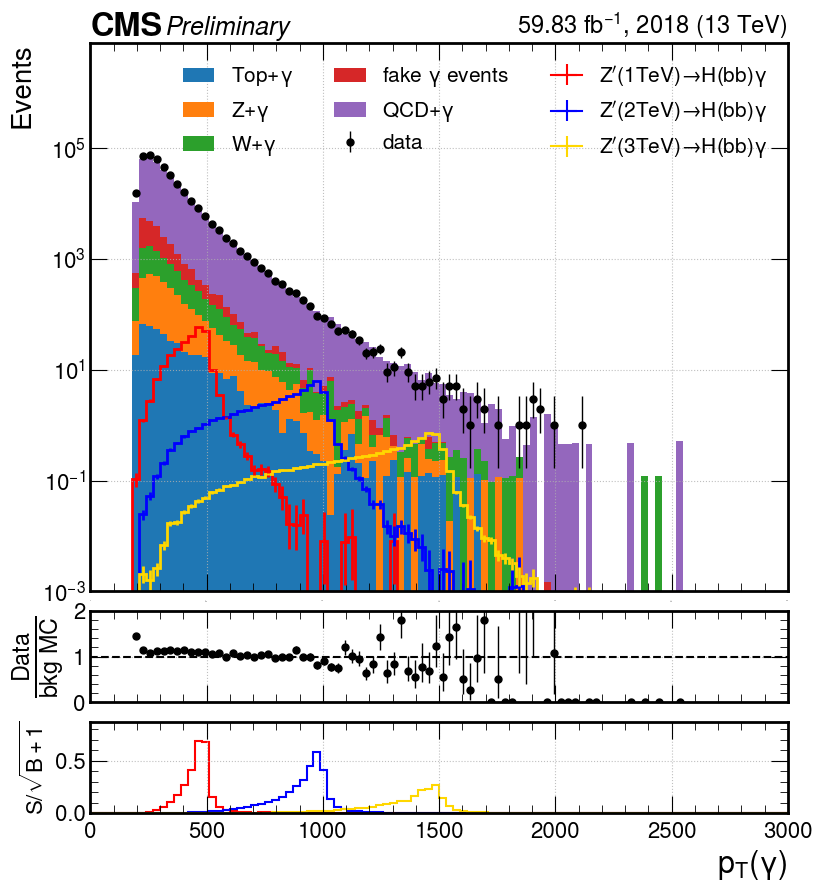

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid va

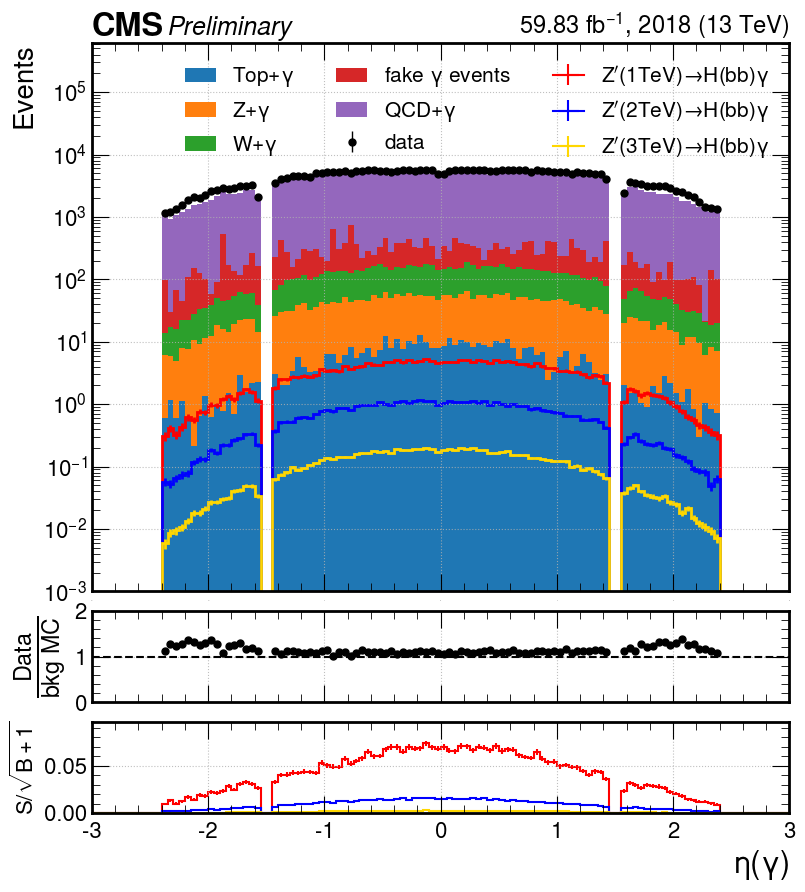

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid va

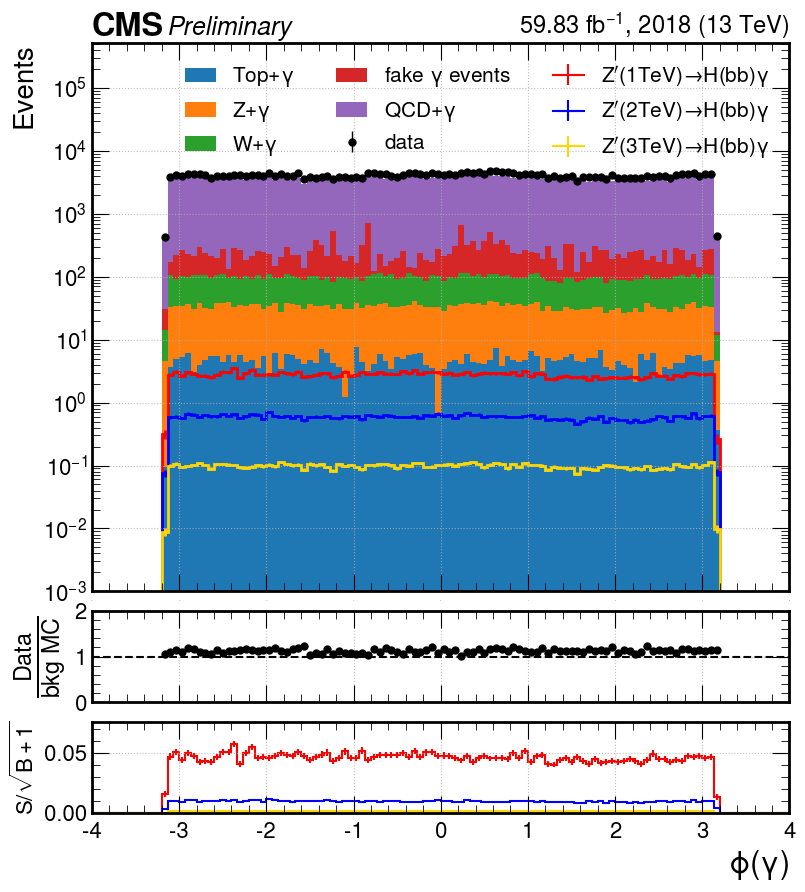

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid va

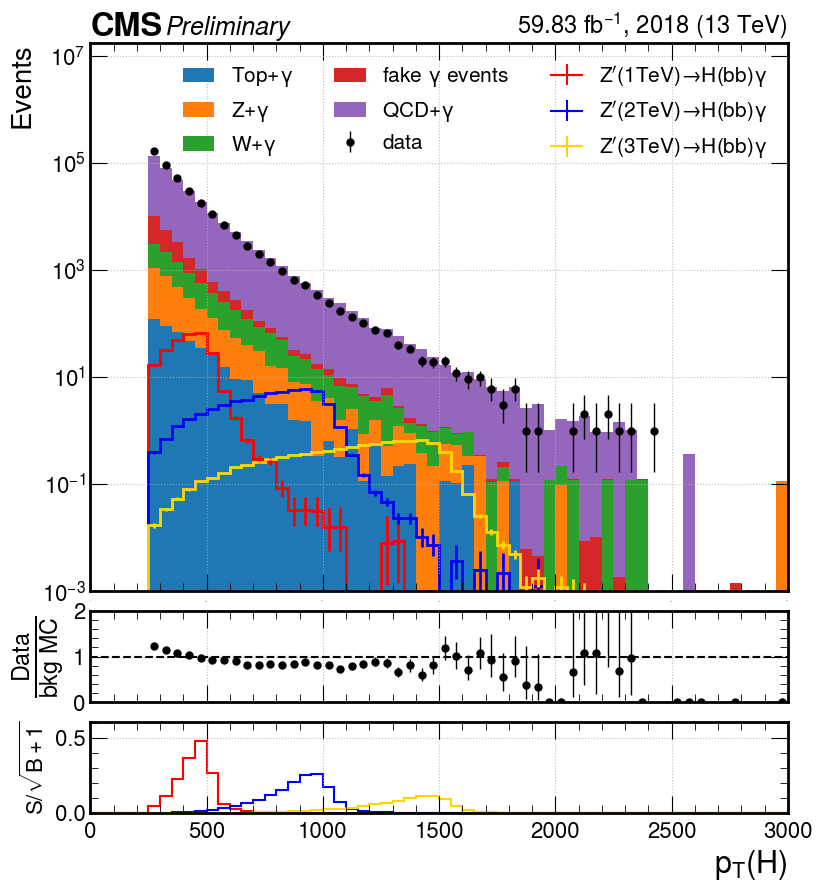

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: divide by zero encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/home/dfu/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_ba

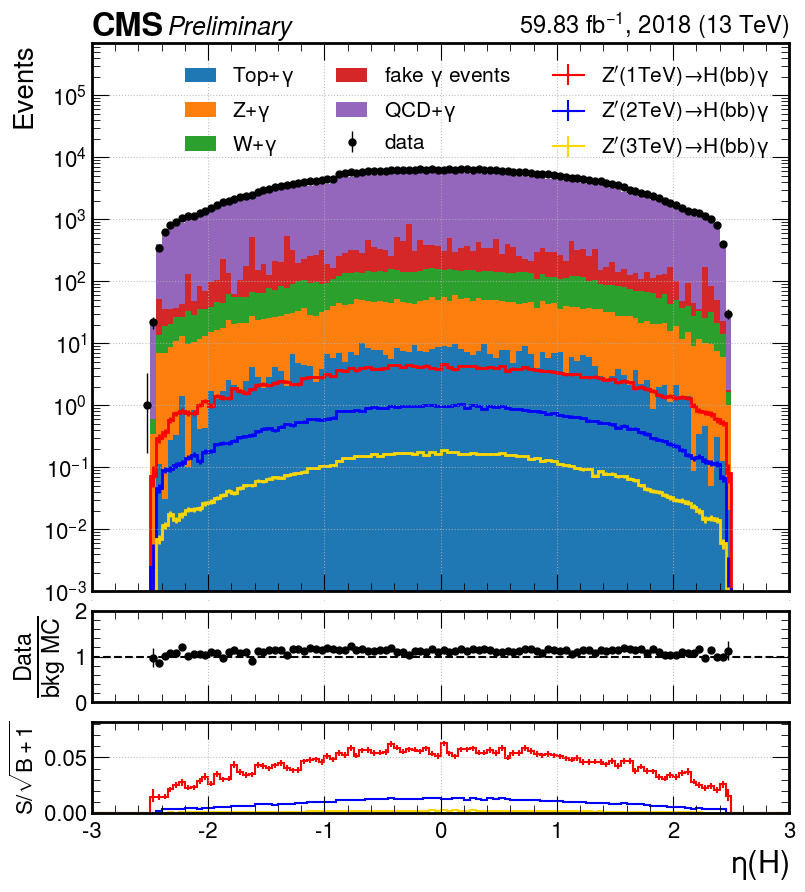

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid va

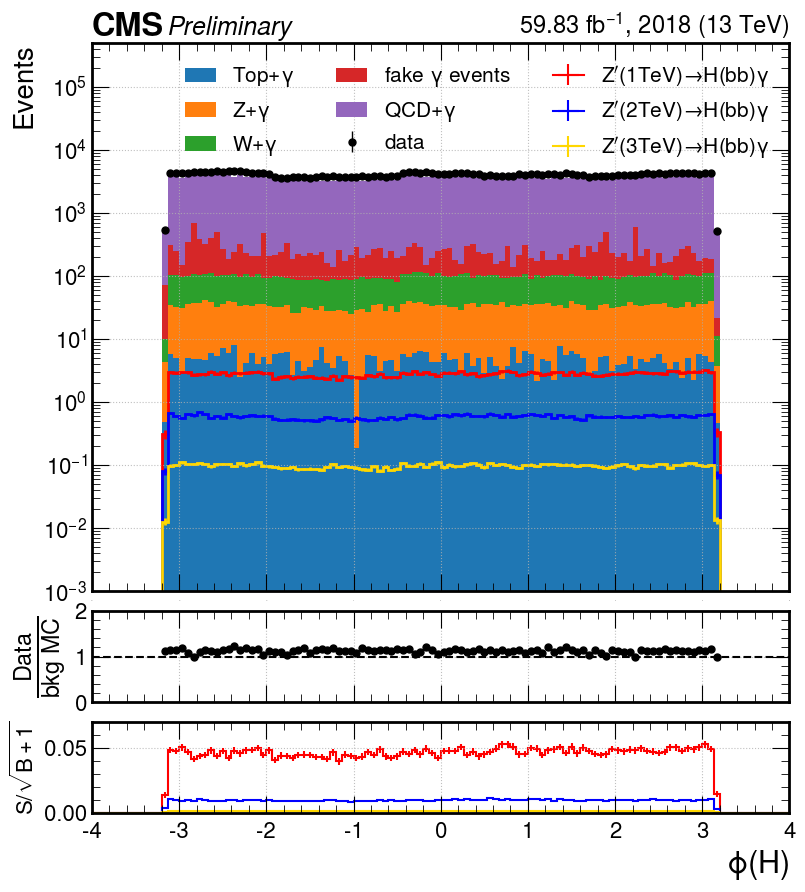

/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h


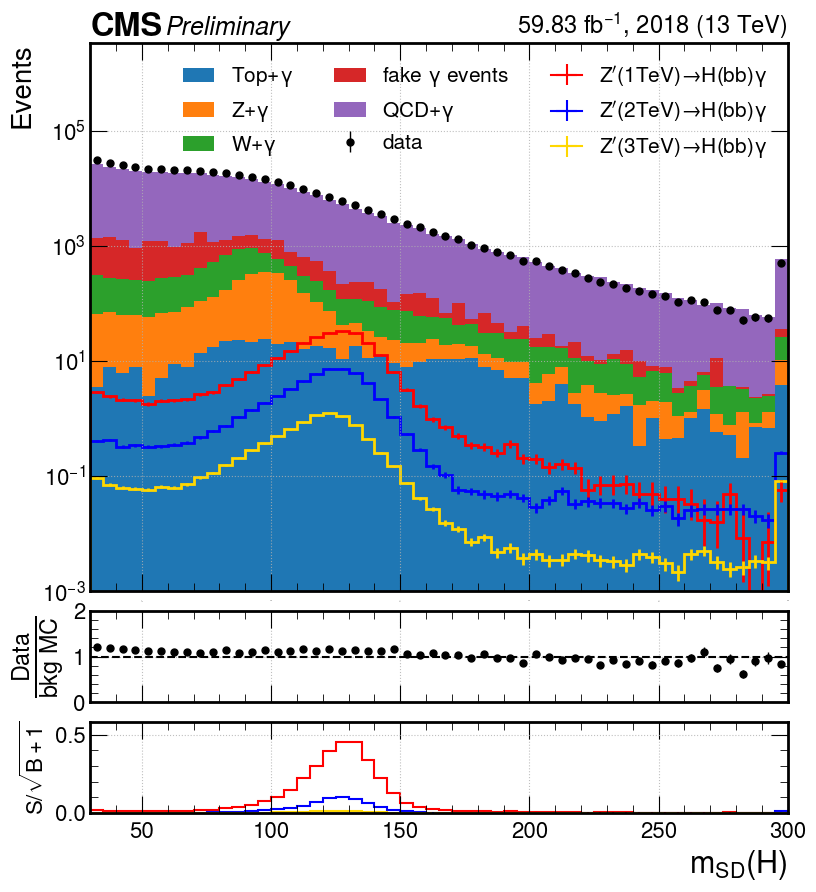

In [10]:
for y in events:
    if y != '2018':
        continue
    arrays={k: events[y][k]['AK8jet_rankToHiggsMass'] for k in events[y]}
    data_mc_compare_plot(arrays, x_name=r'rank($|m_{SD}^{jet}-m_H|$) of the selected Higgs jet', plot_name='AK8jet_rankToHiggsMass', x_max=4, bins=4, weight=weight[y], year=y, fraction_log=False)
    arrays={k: events[y][k].photon_pt for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='photon_pt', x_name=r'$p_T(\gamma)$', x_max=3000, x_min=0, bins=100, weight=weight[y], year=y)
    arrays={k: events[y][k].photon_eta for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='photon_eta', x_name=r'$\eta(\gamma)$', x_max=3, x_min=-3, bins=120, weight=weight[y], year=y)
    arrays={k: events[y][k].photon_phi for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='photon_phi', x_name=r'$\phi(\gamma)$', x_max=4, x_min=-4, bins=120, weight=weight[y], year=y)
    arrays={k: events[y][k].AK8jet_pt for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='AK8jet_pt', x_name=r'$p_T(H)$', x_max=3000, x_min=0, bins=60, weight=weight[y], year=y)
    arrays={k: events[y][k].AK8jet_eta for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='AK8jet_eta', x_name=r'$\eta(H)$', x_max=3, x_min=-3, bins=120, weight=weight[y], year=y)
    arrays={k: events[y][k].AK8jet_phi for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='AK8jet_phi', x_name=r'$\phi(H)$', x_max=4, x_min=-4, bins=120, weight=weight[y], year=y)
    arrays={k: events[y][k].AK8jet_msoftdrop for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='AK8jet_msoftdrop', x_name=r'$m_{SD}(H)$', x_max=300, x_min=30, bins=54, weight=weight[y], year=y)

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid va

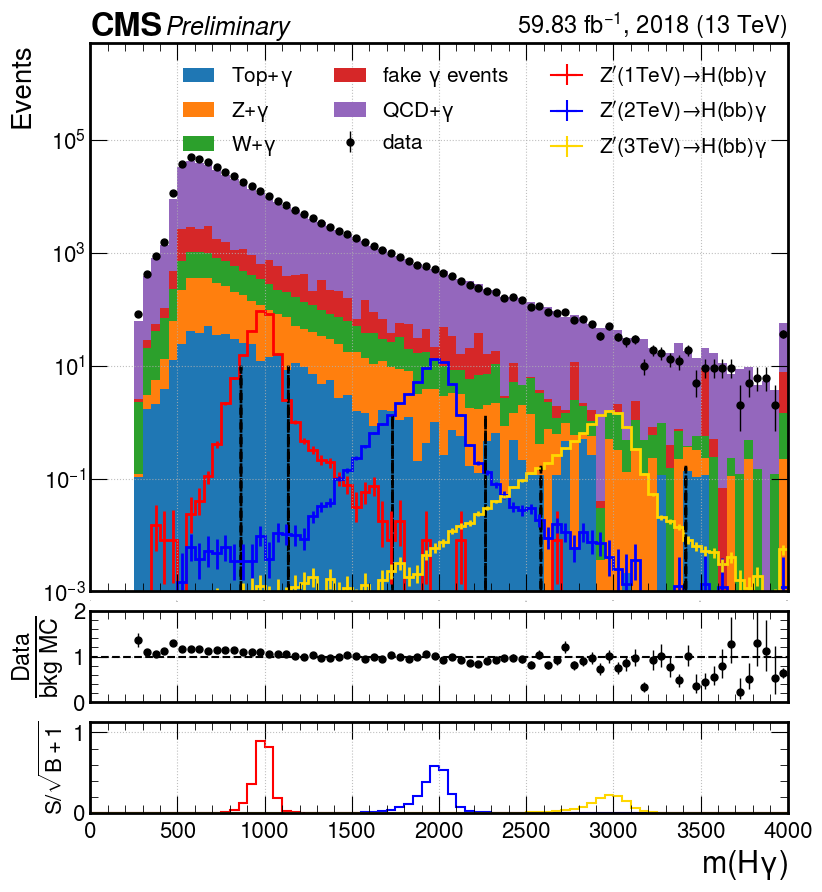

/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h


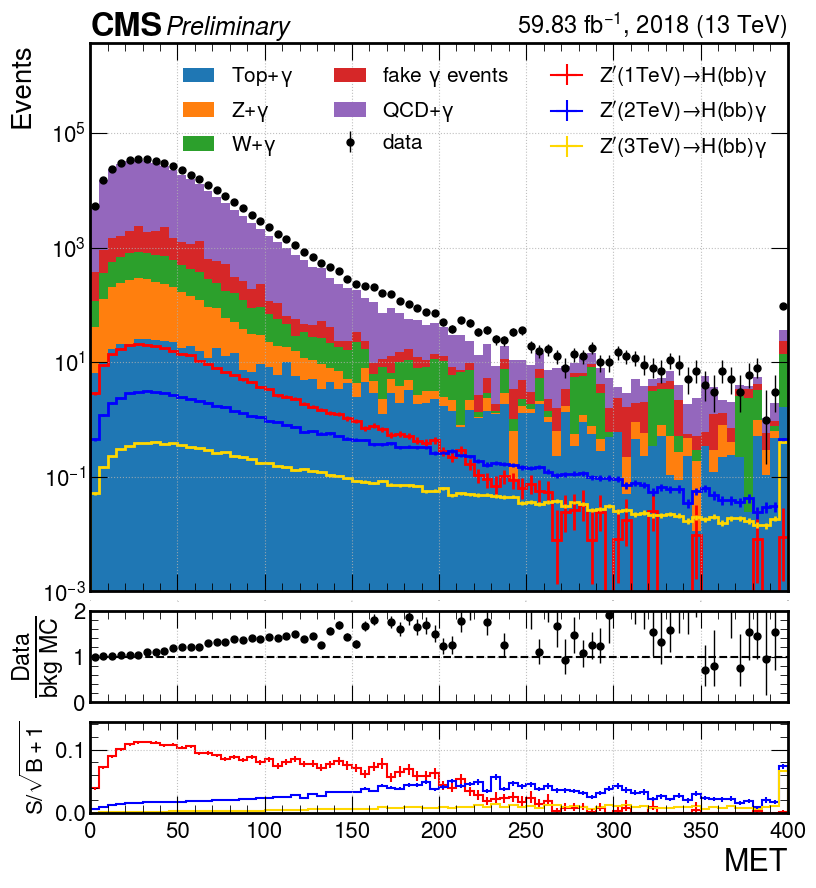

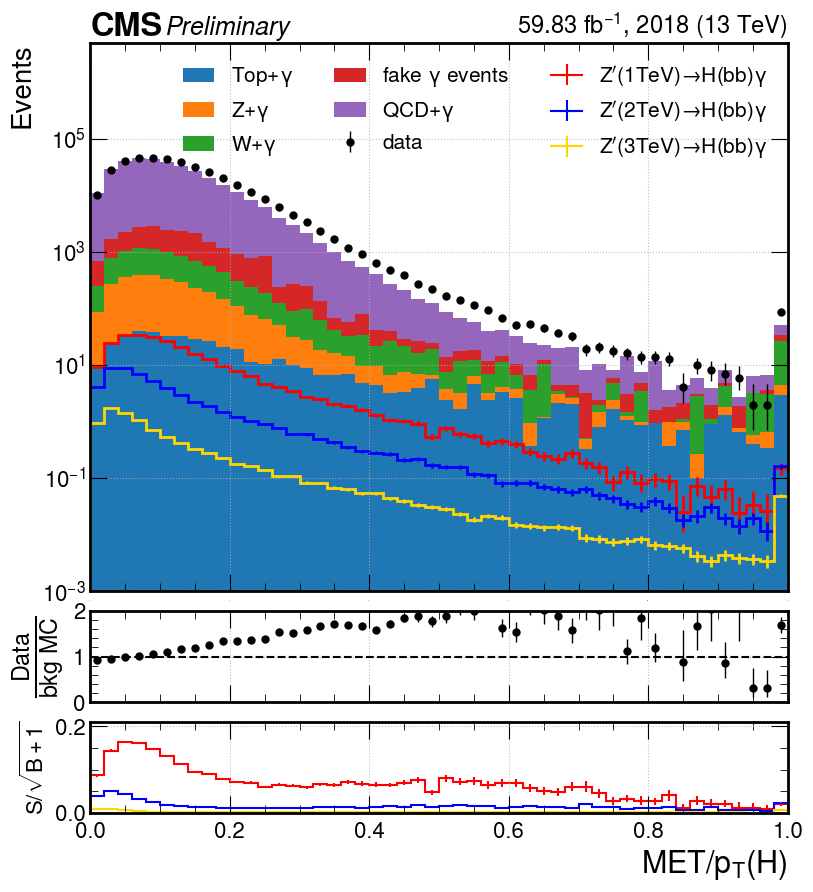

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid va

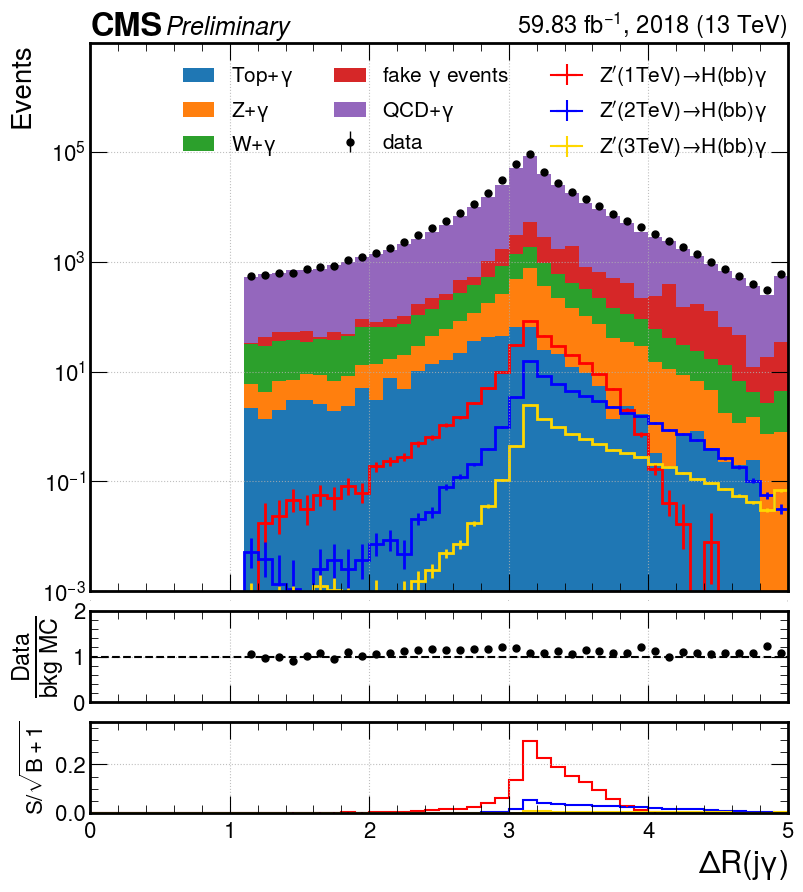

/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid v

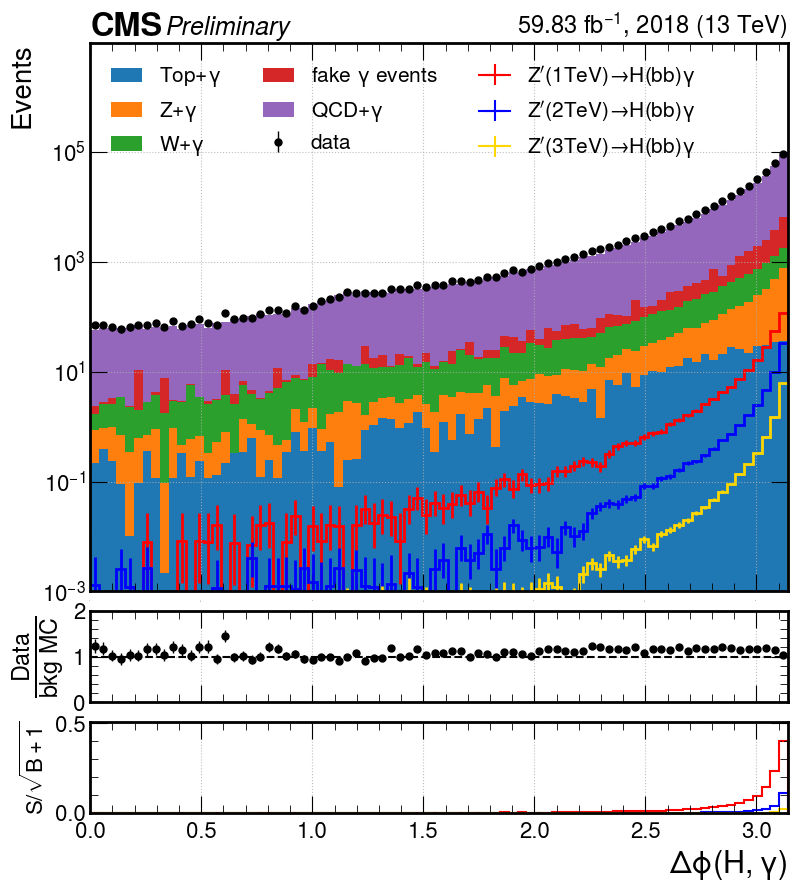

/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h


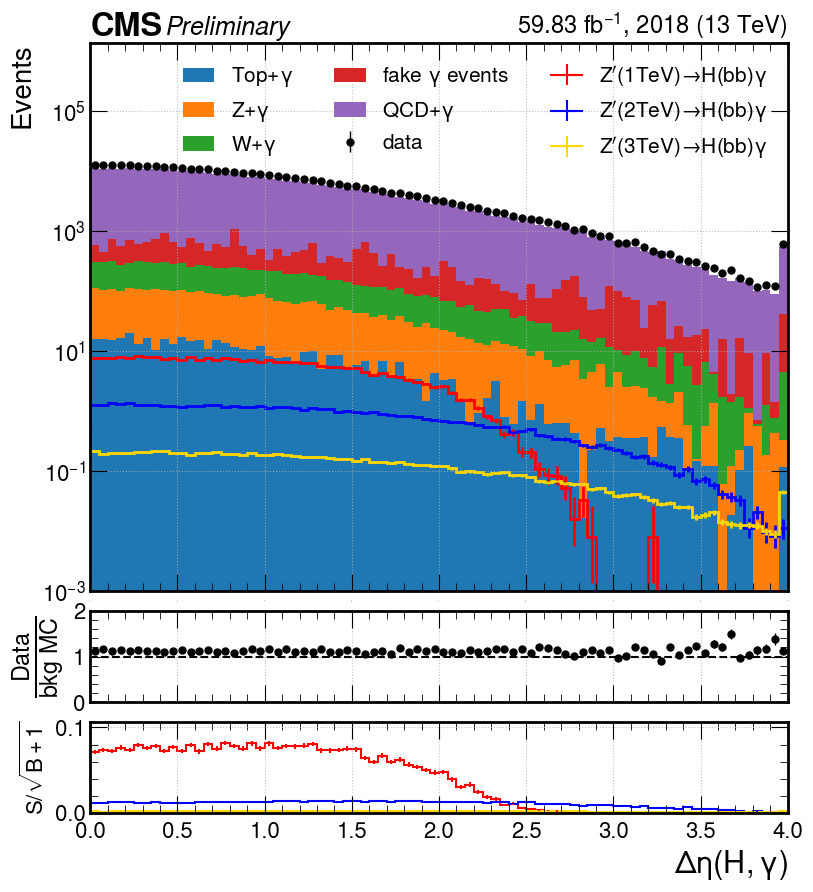

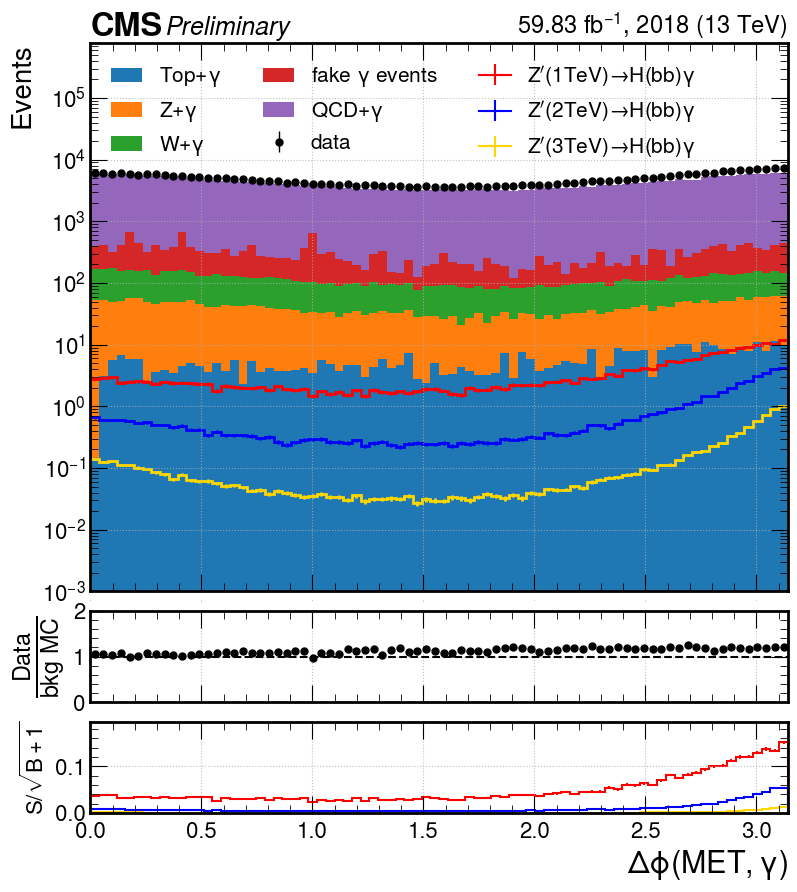

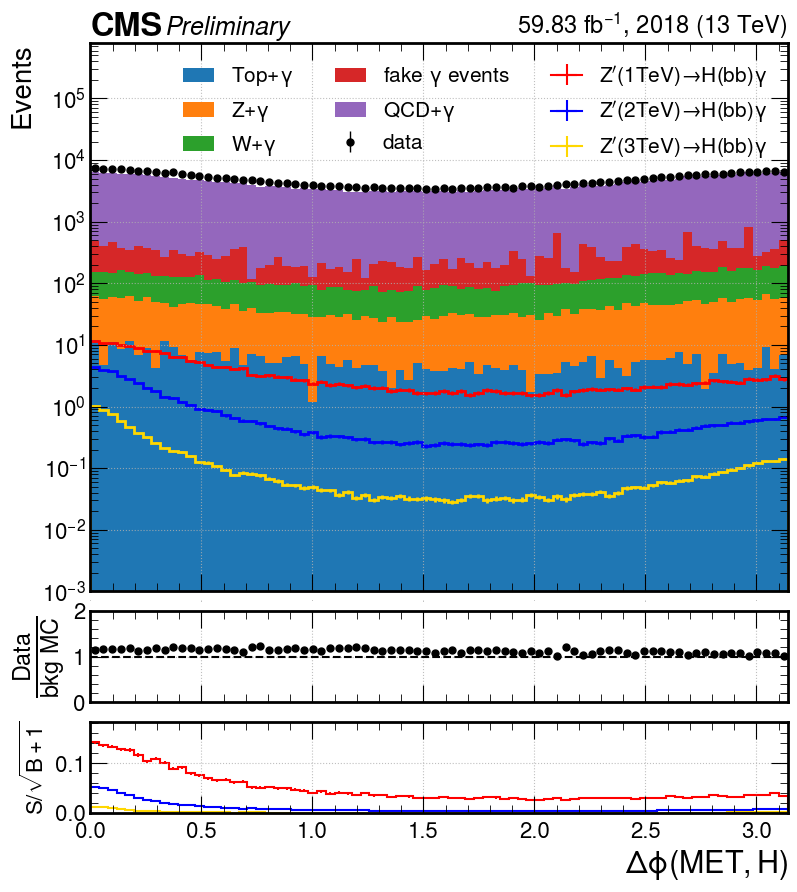

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: divide by zero encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/home/dfu/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_ba

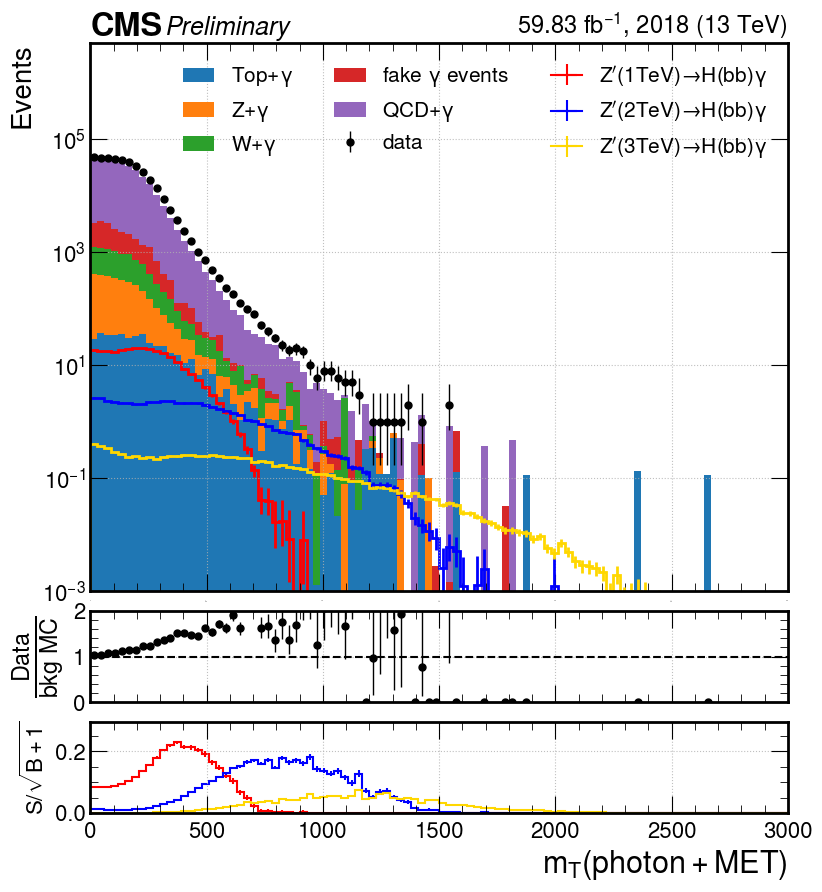

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: divide by zero encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/home/dfu/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_ba

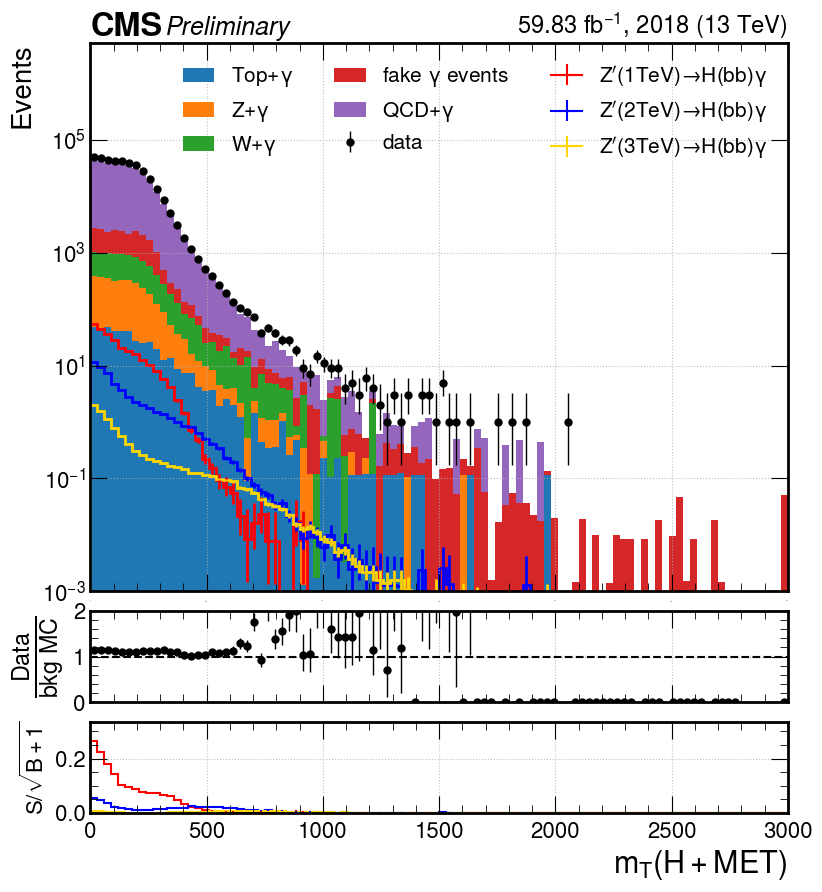

/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: divide by zero encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/tmp/ipykernel_1291579/710327429.py:59: RuntimeWarning: invalid value encountered in divide
  hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
/home/dfu/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_1291579/3056255085.py:31: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_1291579/3056255085.py:47: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_1291579/3056255085.py:48: RuntimeWarning: invalid value encountered in divide
  down_error_ba

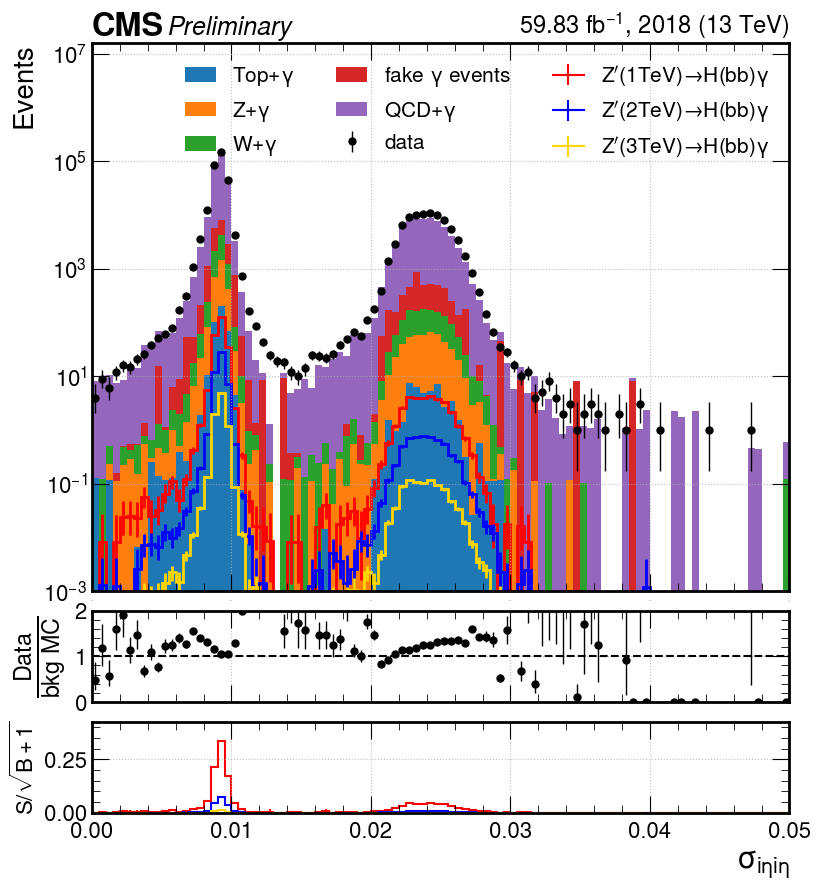

In [11]:
for y in events:
    if y != '2018':
        continue
    arrays={k: events[y][k]['photon+jet_mass'] for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='photon+jet_mass', x_name=r'$m(H\gamma)$', x_max=4000, bins=80, weight=weight[y], year=y, mass_window=True)
    arrays={k: events[y][k]['event_MET_pt'] for k in events[y]}
    data_mc_compare_plot(arrays, x_name='MET', plot_name='event_MET_pt', x_max=400, bins=80, weight=weight[y], year=y, fraction_log=False)
    arrays={k: events[y][k].event_MET_pt/events[y][k].AK8jet_pt for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='MET_over_AK8jet_pt', x_name=r'$MET/p_T(H)$', x_max=1, x_min=0, bins=50, weight=weight[y], year=y, fraction_log=False)
    arrays={k: events[y][k]['photon-jet_deltaR'] for k in events[y]}
    data_mc_compare_plot(arrays, x_name=r'$\Delta R(j\gamma)$', plot_name='photon-jet_deltaR', x_max=5, bins=50, weight=weight[y], year=y)
    arrays={k: np.min([abs(events[y][k].photon_phi - events[y][k].AK8jet_phi), 2*np.pi - abs(events[y][k].photon_phi - events[y][k].AK8jet_phi)], axis=0) for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='photon-jet_delta_phi', x_name=r'$\Delta\phi(H, \gamma)$', x_max=np.pi, x_min=0, bins=80, weight=weight[y], year=y)
    arrays={k: abs(events[y][k].photon_eta - events[y][k].AK8jet_eta) for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='photon-jet_delta_eta', x_name=r'$\Delta\eta(H, \gamma)$', x_max=4, x_min=0, bins=80, weight=weight[y], year=y)
    arrays={k: np.min([abs(events[y][k].photon_phi - events[y][k].event_MET_phi), 2*np.pi - abs(events[y][k].photon_phi - events[y][k].event_MET_phi)], axis=0) for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='MET-photon_delta_phi', x_name=r'$\Delta\phi(MET,\gamma)$', x_max=np.pi, x_min=0, bins=80, weight=weight[y], year=y)
    arrays={k: np.min([abs(events[y][k].AK8jet_phi - events[y][k].event_MET_phi), 2*np.pi - abs(events[y][k].AK8jet_phi - events[y][k].event_MET_phi)], axis=0) for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='MET-AK8jet_delta_phi', x_name=r'$\Delta\phi(MET, H)$', x_max=np.pi, x_min=0, bins=80, weight=weight[y], year=y)
    arrays={k: events[y][k]['MET+photon_mT'] for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='MET+photon_mT', x_name=r'$m_T(photon+MET)$',  x_max=3000, bins=100, weight=weight[y], year=y)
    arrays={k: events[y][k]['MET+AK8jet_mT'] for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='MET+AK8jet_mT', x_name=r'$m_T(H+MET)$', x_max=3000, bins=100, weight=weight[y], year=y, fraction_log=False)
    arrays={k: events[y][k]['photon_sieie'] for k in events[y]}
    data_mc_compare_plot(arrays, plot_name='photon_sieie', x_name=r'$\sigma_{i\eta i\eta}$', x_max=0.05, x_min=0, bins=100, weight=weight[y], year=y, fraction_log=False)

## $MET/p_T$ study

In [13]:
import plotly.express as px
import pandas as pd

y='2018'
arrays={k: events[y][k].event_MET_pt/events[y][k].AK8jet_pt for k in events[y]}
low={k: ak.sum(arrays[k]<0.3) for k in arrays}
medium={k: ak.sum((arrays[k]>0.3)&(arrays[k]<0.6)) for k in arrays}
high={k: ak.sum(arrays[k]>0.6) for k in arrays}

df = pd.DataFrame({
    'component': [k for k in arrays if k not in ['data', 'Zp(2TeV)ToHG']], 
    'MET/p_T^j<0.3': [ak.sum((arrays[k]<0.3)*weight['2018'][k]) for k in arrays if k not in ['data', 'Zp(2TeV)ToHG']],
    '0.3<MET/p_T^j<0.6': [ak.sum(((arrays[k]>0.3)&(arrays[k]<0.6))*weight['2018'][k]) for k in arrays if k not in ['data', 'Zp(2TeV)ToHG']],
    'MET/p_T^j>0.6': [ak.sum((arrays[k]>0.6)*weight['2018'][k]) for k in arrays if k not in ['data', 'Zp(2TeV)ToHG']],
})

fig = px.pie(df, values='MET/p_T^j<0.3', names='component', color='component', title='MET/p_T(j)<0.3')
fig.update_layout(autosize=False, width=600, height=500,margin=dict(l=20, r=20, t=40, b=20),)
fig.show()
#fig.write_image('./plots/low.png')
fig = px.pie(df, values='0.3<MET/p_T^j<0.6', names='component', color='component', title='0.3<MET/p_T(j)<0.6')
fig.update_layout(autosize=False, width=600, height=500,margin=dict(l=20, r=20, t=40, b=20),)
fig.show()
#fig.write_image('./plots/medium.png')
fig = px.pie(df, values='MET/p_T^j>0.6', names='component', color='component', title='MET/p_T(j)>0.6')
fig.update_layout(autosize=False, width=600, height=500,margin=dict(l=20, r=20, t=40, b=20),)
fig.show()
#fig.write_image('./plots/high.png')

In [43]:
#arrays = {k: events['2018'][k]['photon-jet_mass'] for k in events['2018']}
#for k in set(arrays.keys()):
    if k.startswith('Zp'):
        arrays[k.replace('HG', 'H(WW)G')] = arrays[k][
            events['2018'][k]['gen_ZpToH(WW)Gamma'] & 
            (events['2018'][k].event_MET_pt/events['2018'][k].AK8jet_pt > 0.6)
        ]
        weight['2018'].update({
            k.replace('HG', 'H(WW)G'): events['2018'][k].event_weight[
                events['2018'][k]['gen_ZpToH(WW)Gamma'] & 
                (events['2018'][k].event_MET_pt/events['2018'][k].AK8jet_pt > 0.6)
            ]
        })
        del arrays[k]
    else:
        arrays[k] = arrays[k][
            (events['2018'][k].event_MET_pt/events['2018'][k].AK8jet_pt > 0.6)
        ]
        if k=='data':
            continue
        weight['2018'].update({
            k: events['2018'][k].event_weight[
                (events['2018'][k].event_MET_pt/events['2018'][k].AK8jet_pt > 0.6)
            ]
        })
        
        
data_mc_compare_plot(arrays, plot_name='high_MET_photon-jet_mass', x_name=r'$m_{j\gamma}$', x_max=3500, bins=35, weight=weight['2018'], year='2018', density=False)
data_mc_compare_plot(arrays, plot_name='high_MET_photon-jet_mass', x_name=r'$m_{j\gamma}$', x_max=3500, bins=35, weight=weight['2018'], year='2018', density=True)

IndentationError: unexpected indent (2876207102.py, line 3)

# Optimizing

In [14]:
events['2018']

{'Top+$\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='12656 * {AK8jet_rankT...'>,
 'Z+$\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='45281 * {AK8jet_rankT...'>,
 'W+$\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='83795 * {AK8jet_rankT...'>,
 'fake $\\gamma$ events': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='5999 * {AK8jet_rankTo...'>,
 'QCD+$\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='314934 * {AK8jet_rank...'>,
 '$Z^\\mathrm{\\prime}(1TeV)\\to H\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='56626 * {AK8jet_rankT...'>,
 '$Z^\\mathrm{\\prime}(2TeV)\\to H\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='77794 * {AK8jet_rankT...'>,
 '$Z^\\mathrm{\\prime}(3TeV)\\to H\\gamma$': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='80172 * {AK8jet_rankT...'>,
 'data': <Array [{...}, {...}, {...}, ..., {...}, {...}] type='385864 * {AK8jet_rank...'>,
 '$Z^\\mathrm{\\prime}(1

In [15]:
hep.style.use("CMS")

def signal_window_arrays(arrays: dict, weight: dict, event_cut: dict, bins: int=40, x_min: float=0, x_max: float=2000, overflow: bool=True, underflow: bool=False):
    cut, cut_arrays, cut_weight = {'h': {}, 'var': {}}, {}, {}
    
    for k, array in arrays.items():
        cut_arrays[k] = array[event_cut[k]]
        if k!='data':
            cut_weight[k] = weight[k][event_cut[k]]
    
    for (k, v) in cut_arrays.items():
        hist = bh.Histogram(bh.axis.Regular(bins, x_min, x_max), storage=bh.storage.Weight())
        values = ak.fill_none(v, -999)
        if k!='data':
            hist.fill(values, weight=cut_weight[k])
        else:
            hist.fill(values)
        cut['h'][k], cut['var'][k] = flow(hist=hist, overflow=overflow, underflow=underflow)

    return cut['h'], cut['var']
    

def optimizing_plot(arrays, weight, plot_name: str, x_name: str, cuts=None, year='2018', bins=40, x_min=0, x_max=2000, density=True, overflow=True, underflow=False, fraction_log=False, mode: str='less'):
    LUMI = {"2016pre": 19.52, "2016post": 16.81, "2017": 41.48, "2018": 59.83,}
    bin_width = (x_max-x_min)/bins
    if cuts:
        arrays = {k: v[cuts[k]] for k, v in arrays.items()}
        _weight = {k: weight[k][cuts[k]] for k in arrays if k in weight}
        _events = {k: events[year][k][cuts[k]] for k in arrays}
    else:
        _weight = {k: weight[k] for k in arrays if k in weight}
        _events = {k: events[year][k] for k in arrays}
        
    ## canvas initializing
    # f, ax = plt.subplots()
    f = plt.figure(figsize=(9, 10))
    gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0.2)
    ax = f.add_subplot(gs[0])
    #ax = plt.gca()
    plt.grid()
    hep.cms.label(data=True, year=year, ax=ax, lumi=LUMI[year], fontsize=18, llabel='Preliminary')
    ## Ratio panel
    ax1 = f.add_subplot(gs[1])
    ax1.grid()
    
    ## analyze
    stacked = {'h': {}, 'var': {}}
    individual = {'h': {}, 'var': {}}
 
    for (k,v) in arrays.items():
        hist = bh.Histogram(bh.axis.Regular(bins, x_min, x_max), storage=bh.storage.Weight())
        values = ak.fill_none(v, -999)
        
        if k!='data':
            hist.fill(values, weight=_weight[k])
        else:
            hist.fill(values)
        h, var = flow(hist=hist, overflow=overflow, underflow=underflow)
        
        if k in BKG: 
            stacked['h'][k] = h
            stacked['var'][k] = var
        else:
            individual['h'][k] = h
            individual['var'][k] = var


    ## plot
    # mpl.rcParams['axes.prop_cycle'] = cycler(color=['darkorange', 'cyan', 'HotPink', 'darkviolet', 'SlateGray', 'black', 'LightSkyBlue'])
    # or you can specify color='blue' in the above function to cover colorlist (you could comment out colorlist too)
    if len(stacked['h'].keys())>0:
        hep.histplot(list(stacked['h'].values()), bins=hist.axes[0].edges, label=list(stacked['h'].keys()), histtype='fill', density=False, stack=True, linewidth=2, ax=ax)
        bkg_h = np.sum(list(stacked['h'].values()), axis=0)
    
    for (k, h) in individual['h'].items():
        if k=='data':
            err = error_bar(h, individual['var'][k], type='data')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k+r'($m_H$ sideband)', color='black', histtype='errorbar', density=False, stack=False, ax=ax)
        elif k in SIG_COLOR:  # signal
            err = error_bar(h, individual['var'][k], type='mc')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, histtype='step', density=False, stack=False, linewidth=2, ax=ax, color=SIG_COLOR[k])
            
            ## begin optimizing plot
            mass_center = float(k.split('(')[1][0]) * 1e3
            mass_std = ak.std(_events[k]['photon+jet_mass'], weight=_weight[k])
            cut_h, cut_var = signal_window_arrays(
                arrays=arrays, weight=_weight, event_cut={
                    k: (_events[k]['photon+jet_mass'] > mass_center - 3*mass_std) & (_events[k]['photon+jet_mass'] < mass_center + 3*mass_std) for k in arrays
                }, bins=bins, x_min=x_min, x_max=x_max, overflow=overflow, underflow=underflow
            )
            cut_bkg_h = np.sum([h for k, h in cut_h.items() if k in BKG], axis=0)
            
            if mode=='less':
                y = [ak.sum(cut_h[k][:index]) / np.sqrt(ak.sum(cut_bkg_h[:index]) + 1) for index in range(bins)]
            elif mode=='greater':
                y = [ak.sum(cut_h[k][index:]) / np.sqrt(ak.sum(cut_bkg_h[index:]) + 1) for index in range(bins)]
            y_max_bin = np.argmax(y)
            hep.histplot(y, bins=hist.axes[0].edges, label=k, histtype='step', density=density, stack=False, ax=ax1, color=SIG_COLOR[k], linestyle='dashed')
            #plt.arrow(x=hist.axes[0].edges[y_max_bin], y=np.max(y), dx=0, dy=-np.max(y), length_includes_head=True, color=SIG_COLOR[k])

    ## axises
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel(x_name, fontsize=20, ha='right', x=1)
    # ax.set_xticklabels([])
    ax.set_ylim(1e-3, ax.get_ylim()[1]*1e2)
    ax.set_yscale('log')
    # ax.ticklabel_format(useOffset=False, style='scientific')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='x', which='major', labelsize=0)
    # x_major_locator=plt.MultipleLocator(bin_width*8 if variable=='fj_gen_mass' else bin_width*2)
    # y_major_locator=MultipleLocator(1)
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)    
    ax.set_ylabel('Events', fontsize=20, ha='right', y=1)

    
    #ax1.set_yscale('log')
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.2)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_xlabel('cut_value', fontsize=21, ha='right', x=1)
    ax1.set_ylabel('sensitivity'+('\n(A.U.)' if density else ''), ha='center', fontsize=16)
    ax1.ticklabel_format(useOffset=False, style='plain')
    ax1.tick_params(axis='both', which='major', labelsize=16)

    plt.xticks(size=16)
    plt.yticks(size=16)

    ## title, text and legend
    # plt.title('ROC Curve of HWW4q vs. QCD', fontsize=24,color="black")
    ax.legend(loc="best", ncol=3, frameon=False, fontsize=15)
    # plt.text(0.96*ax.get_xlim()[1], ax.get_ylim()[1]*0.72,"At "+r"$\mathrm{m^{gen}_{H}=}$"+f"{Higgsmass} GeV", fontsize=24, color="black", ha='right')

    ## finalizing
    suffix = '_AU' if density else ''
    if not os.path.exists('./plots/optimize'):
        os.makedirs('./plots/optimize')
    plt.savefig(f"./plots/optimize/{year}_{plot_name}{suffix}.pdf", bbox_inches='tight')
    plt.show()

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide



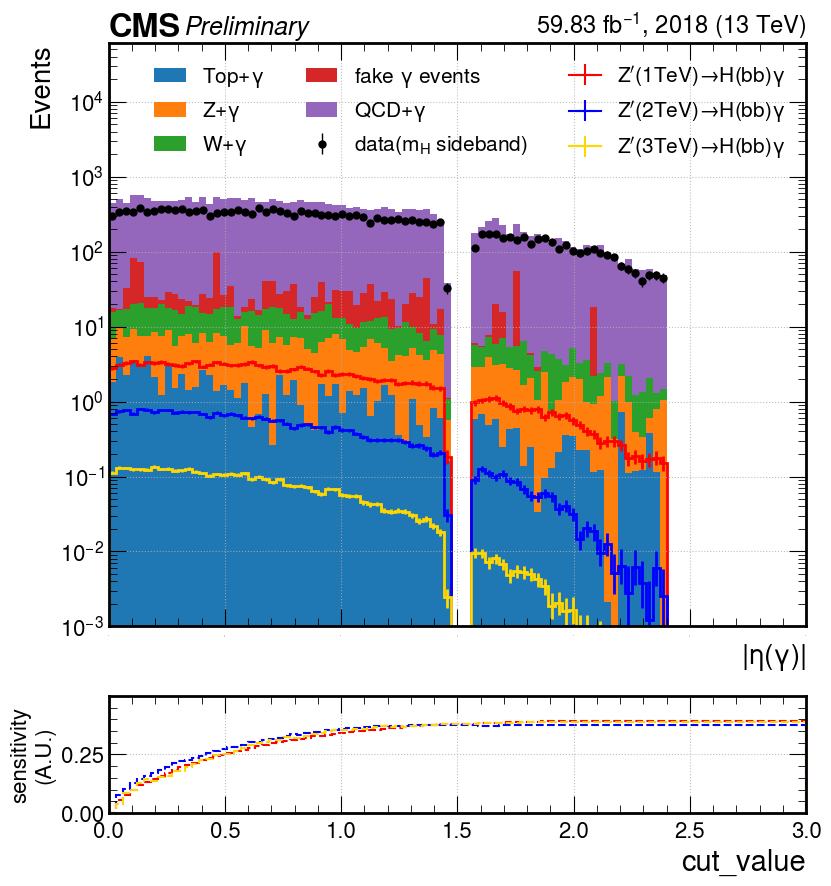

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide



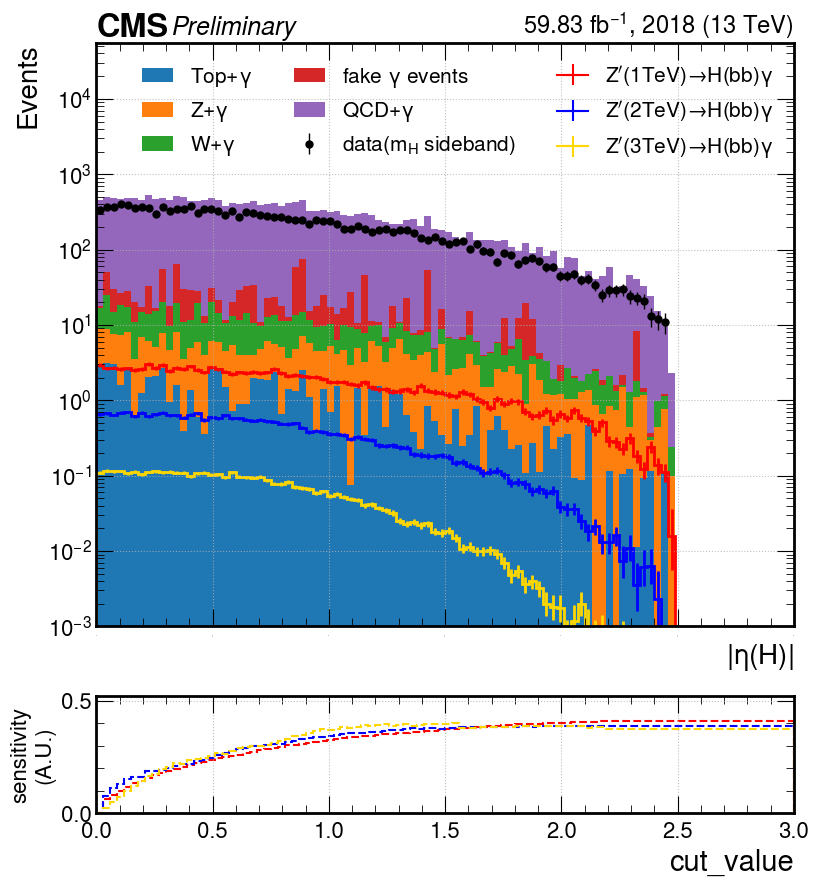

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide



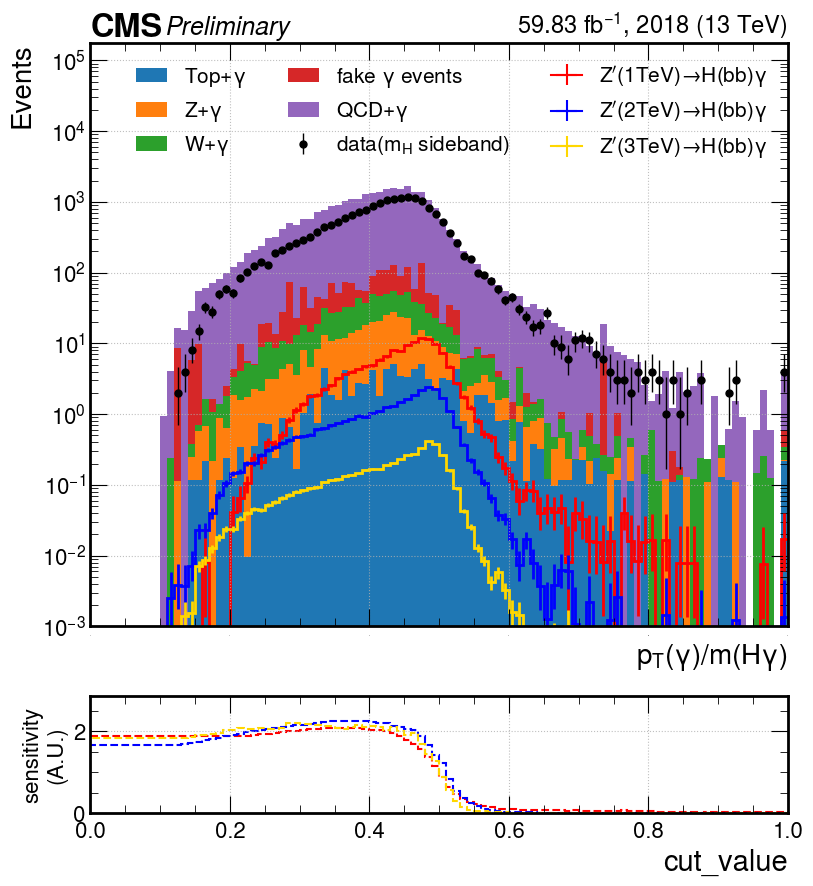

In [16]:
y='2018'
full_cuts = """{
k: ((events[y][k]['AK8jet_msoftdrop'] > 100) & (events[y][k]['AK8jet_msoftdrop'] < 110) if k=='data' else (events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140)) &
(np.abs(events[y][k].photon_eta) < 1.4442) &
(np.abs(events[y][k].AK8jet_eta) < 2.4) &
(events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
for k in arrays
}"""

arrays={k: np.abs(events[y][k].photon_eta) for k in events[y]}
optimizing_plot(
    arrays, mode='less', cuts=eval(
        full_cuts.replace("(np.abs(events[y][k].photon_eta) < 1.4442) &", "")
    ), plot_name='abs_photon_eta', x_name=r'$|\eta(\gamma)|$', x_max=3, x_min=0, bins=100, weight=weight[y], year=y
)

arrays={k: np.abs(events[y][k].AK8jet_eta) for k in events[y]}
optimizing_plot(
    arrays, mode='less', cuts=eval(
        full_cuts.replace("(np.abs(events[y][k].AK8jet_eta) < 2.4) &", "")
    ), plot_name='abs_jet_eta', x_name=r'$|\eta(H)|$', x_max=3, x_min=0, bins=100, weight=weight[y], year=y
)

arrays={k: events[y][k].photon_pt/events[y][k]['photon+jet_mass'] for k in events[y]}
optimizing_plot(
    arrays, mode='greater', cuts=eval(
        full_cuts.replace("&\n(events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)", "")
    ), plot_name='photon_pt_over_photon+jet_mass', x_name=r'$p_T(\gamma)/m(H\gamma)$', x_max=1, x_min=0, bins=100, weight=weight[y], year=y
)

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide



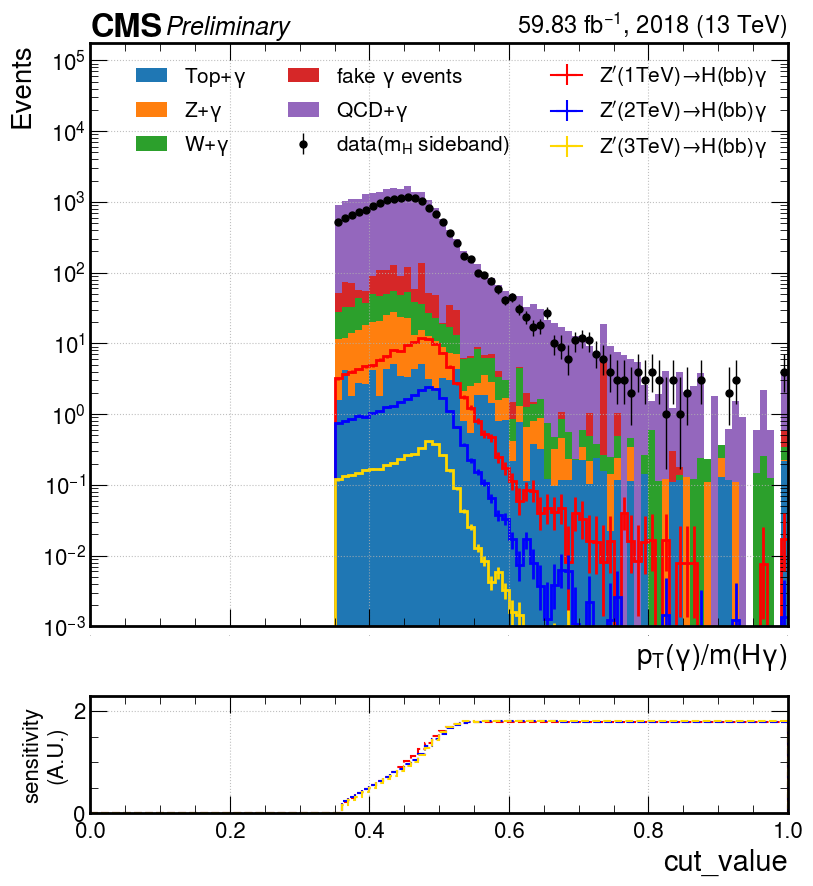

In [17]:
arrays={k: events[y][k].photon_pt/events[y][k]['photon+jet_mass'] for k in events[y]}
optimizing_plot(
    arrays, mode='less', cuts=eval(
        full_cuts.replace(" & (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] < 0.6)", "")
    ), plot_name='right_photon_pt_over_photon+jet_mass', x_name=r'$p_T(\gamma)/m(H\gamma)$', x_max=1, x_min=0, bins=100, weight=weight[y], year=y
)

In [18]:
y='2018'
k=r'$Z^\mathrm{\prime}(2TeV)\to H(bb)\gamma$'
np.corrcoef(x=np.abs(events[y][k].photon_eta - events[y][k].AK8jet_eta), y=events[y][k].photon_pt/events[y][k]['photon+jet_mass'])[0][1]

-0.9122904481016411

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide



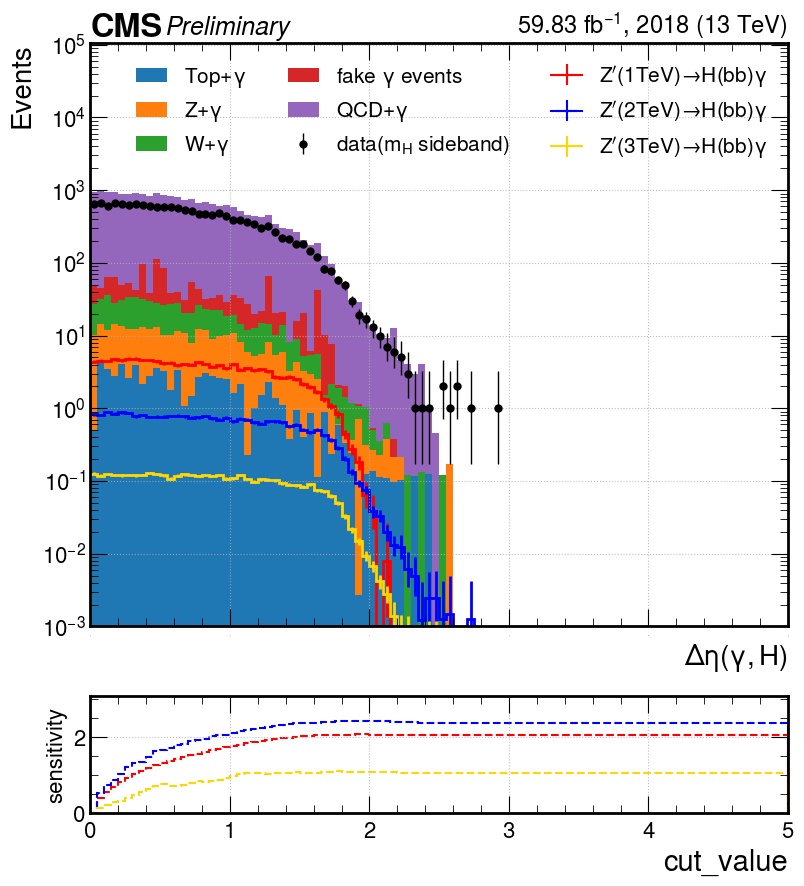

In [19]:
arrays={k: np.abs(events[y][k].photon_eta - events[y][k].AK8jet_eta) for k in events[y]}
optimizing_plot(
    arrays, mode='less', density=False, cuts=eval(
        full_cuts#.replace("&\n((events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35) & (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] < 0.6))", "")
    ), plot_name='delta_eta_photon_jet', x_name=r'$\Delta\eta(\gamma, H)$', x_max=5, x_min=0, bins=100, weight=weight[y], year=y
)

# With full selection

## $Z^\prime$ mass window

/tmp/ipykernel_2472998/616327884.py:61: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide



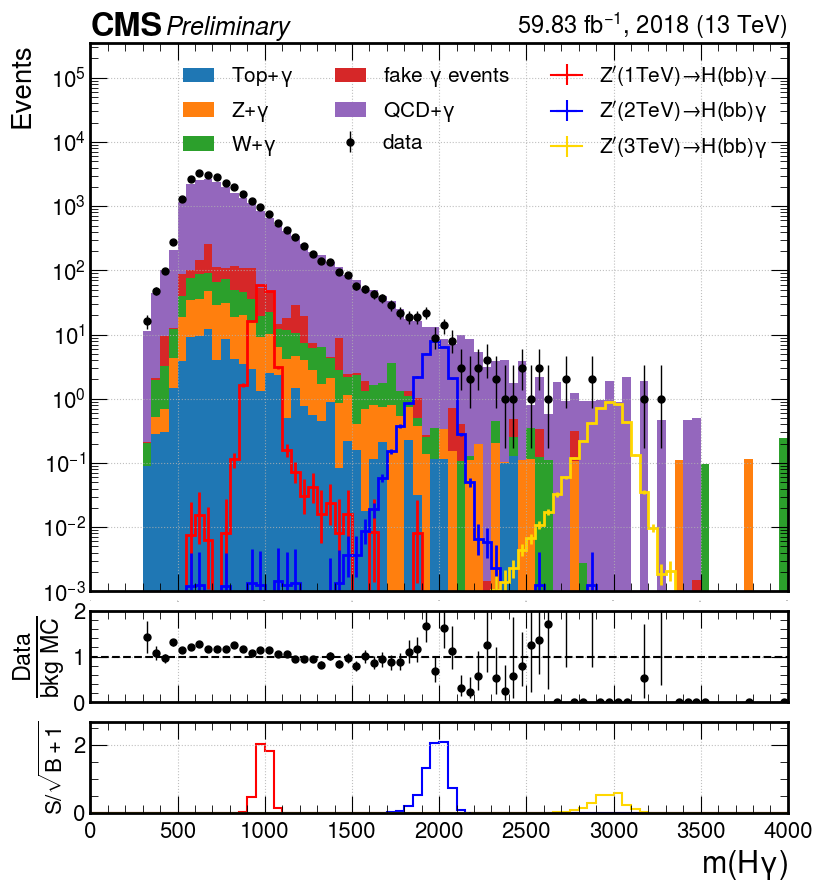

In [34]:
y = '2018'
arrays={
    k: events[y][k]['photon+jet_mass'][
        (events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in events[y]
}
_weight = {
    k: weight[y][k][
        (events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in weight[y]
}
data_mc_compare_plot(arrays, plot_name='full_photon+jet_mass', x_name=r'$m(H\gamma)$', x_max=4000, bins=80, weight=_weight, year=y, mass_window=False)

## $m_H$ distribution

/tmp/ipykernel_2472998/3056255085.py:31: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:47: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_2472998/3056255085.py:48: RuntimeWarning:

invalid value encountered in divide



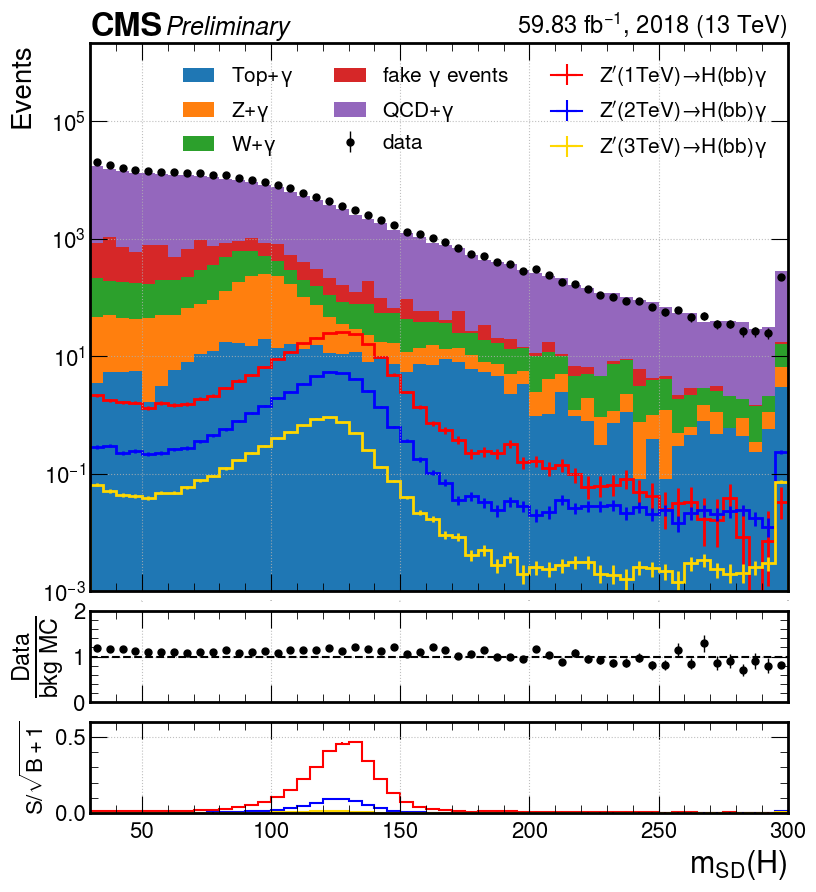

In [68]:
y = '2018'
arrays={
    k: events[y][k]['AK8jet_msoftdrop'][
        #(events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in events[y]
}
_weight = {
    k: weight[y][k][
        #(events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in weight[y]
}
data_mc_compare_plot(arrays, plot_name='full_AK8jet_msoftdrop', x_name=r'$m_{SD}(H)$', x_max=300, x_min=30, bins=54, weight=_weight, year=y, underflow=True)

In [60]:
ak.mean(
    np.concatenate([arrays[k][(arrays[k]<140)&(arrays[k]>110)] for k in BKG], axis=0), 
    weight=np.concatenate([_weight[k][(arrays[k]<140)&(arrays[k]>110)] for k in BKG], axis=0)
)

122.34535540123157

In [67]:
ak.mean(
    np.concatenate([arrays[k][((arrays[k]<110)&(arrays[k]>100))|((arrays[k]<170)&(arrays[k]>140))] for k in BKG], axis=0), 
    weight=np.concatenate([_weight[k][((arrays[k]<110)&(arrays[k]>100))|((arrays[k]<170)&(arrays[k]>140))] for k in BKG], axis=0)
)

121.16267243593411

In [71]:
hep.style.use("CMS")

def mH_mass_plot(arrays, weight, plot_name: str, x_name: str, cuts=None, year='2018', bins=40, x_min=0, x_max=2000, density=False, overflow=False, underflow=False, fraction_log=False, mass_window=False):
    LUMI = {"2016pre": 19.52, "2016post": 16.81, "2017": 41.48, "2018": 59.83,}
    bin_width = (x_max-x_min)/bins
    if cuts:
        arrays = {k: v[cuts[k]] for k, v in arrays.items()}
        
    ## canvas initializing
    f = plt.figure(figsize=(9, 10))
    gs = mpl.gridspec.GridSpec(3, 1, height_ratios=[6, 1, 1], hspace=0.08)
    ax = f.add_subplot(gs[0])
    plt.grid()
    hep.cms.label(data=True, year=year, ax=ax, lumi=LUMI[year], fontsize=18, llabel='Preliminary')
    ## Ratio panel
    ax1 = f.add_subplot(gs[1])
    ax2 = f.add_subplot(gs[2])
    ax1.grid()
    ax2.grid()
    
    ## analyze
    stacked = {'h': {}, 'var': {}}
    individual = {'h': {}, 'var': {}}
    
    for (k,v) in arrays.items():
        hist = bh.Histogram(bh.axis.Variable([100, 110, 140, 170]), storage=bh.storage.Weight())
        if 'delta_phi' in plot_name:
            values = np.min([v, 2*np.pi-v], axis=0)
        values = ak.fill_none(v, -999)
        
        if k!='data' and weight is not None:
            hist.fill(values, weight=weight[k])
        else:
            hist.fill(values)
        h, var = flow(hist=hist, overflow=overflow, underflow=underflow)
        
        if k in BKG: 
            stacked['h'][k] = h
            stacked['var'][k] = var
        else:
            individual['h'][k] = h
            individual['var'][k] = var
        
    ## plot
    ax1.plot([x_min,x_max], [1,1], color='black', linestyle='dashed')
    # or you can specify color='blue' in the above function to cover colorlist (you could comment out colorlist too)
    if len(stacked['h'].keys())>0:
        hep.histplot(list(stacked['h'].values()), bins=hist.axes[0].edges, label=list(stacked['h'].keys()), histtype='fill', density=density, stack=True, linewidth=2, ax=ax)
        bkg_h = np.sum(list(stacked['h'].values()), axis=0)
        # we usually don't care error of background MC cuz the stats is very large (relative error is very small compared with signal and data)
    for (k,h) in individual['h'].items():
        if k=='data':
            err = error_bar(h, individual['var'][k], type='data')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, color='black', histtype='errorbar', density=density, stack=False, ax=ax)
            hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
        elif k in SIG_COLOR:  # signal
            err = error_bar(h, individual['var'][k], type='mc')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, histtype='step', density=density, stack=False, linewidth=2, ax=ax, color=SIG_COLOR[k])
            y = h / np.sqrt(bkg_h + 1)
            hep.histplot(y, bins=hist.axes[0].edges, yerr=err/np.sqrt(bkg_h+1), label=k, histtype='step', density=density, stack=False, ax=ax2, color=SIG_COLOR[k])
            if mass_window:
                mass_center = float(k.split('(')[1][:1])*1e3
                mass_std = ak.std(arrays[k], weight=weight[k])
                ax.arrow(x=mass_center - 2*mass_std, y=np.max(h)/10, dx=0, dy=1e-3-np.max(h)/10, length_includes_head=True, color='black', linewidth=2, linestyle='dashed')
                ax.arrow(x=mass_center + 2*mass_std, y=np.max(h)/10, dx=0, dy=1e-3-np.max(h)/10, length_includes_head=True, color='black', linewidth=2, linestyle='dashed')


    ## axises
    ax.set_xlim(x_min, x_max)
    # ax.set_xticklabels([])
    ax.set_ylim(0, ax.get_ylim()[1]*1.2)
    #if not density:
    #    ax.set_yscale('log')
    # ax.ticklabel_format(useOffset=False, style='scientific')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='x', which='major', labelsize=0)
    # x_major_locator=plt.MultipleLocator(bin_width*8 if variable=='fj_gen_mass' else bin_width*2)
    # y_major_locator=MultipleLocator(1)
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    if density==False:
        ax.set_ylabel('Events', fontsize=20, ha='right', y=1)
    elif density==True:    
        ax.set_ylabel('A.U.', fontsize=20, ha='right', y=1)
    
    ax1.set_xlim(x_min, x_max)
    ax1.set_xticklabels([])
    if fraction_log:
        ax1.set_ylim(1e-1, 1e1)
        ax1.set_yscale('log')
    else:
        ax1.set_ylim(0, 2)
    ax1.set_ylabel(r'$\frac{Data}{bkg\ MC}$', ha='center', fontsize=24)
    #ax1.ticklabel_format(useOffset=False, style='plain')
    ax1.tick_params(axis='both', which='major', labelsize=16)
    
    #ax2.set_yscale('log')
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(0, ax2.get_ylim()[1]*1.2)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    ax2.set_xlabel(x_name, fontsize=22, ha='right', x=1)
    ax2.set_ylabel(r'$S/\sqrt{B+1}$', ha='center', fontsize=16)
    ax2.ticklabel_format(useOffset=False, style='plain')
    ax2.tick_params(axis='both', which='major', labelsize=16)

    plt.xticks(size=16)
    plt.yticks(size=16)

    ## title, text and legend
    # plt.title('ROC Curve of HWW4q vs. QCD', fontsize=24,color="black")
    ax.legend(loc="best", ncol=3, frameon=False, fontsize=15)
    # plt.text(0.96*ax.get_xlim()[1], ax.get_ylim()[1]*0.72,"At "+r"$\mathrm{m^{gen}_{H}=}$"+f"{Higgsmass} GeV", fontsize=24, color="black", ha='right')

    ## finalizing
    suffix = '_AU' if density else ''
    if not os.path.exists('./plots'):
        os.makedirs('./plots')
    plt.savefig(f"./plots/{year}_{plot_name}{suffix}.pdf", bbox_inches='tight')
    plt.show()
    

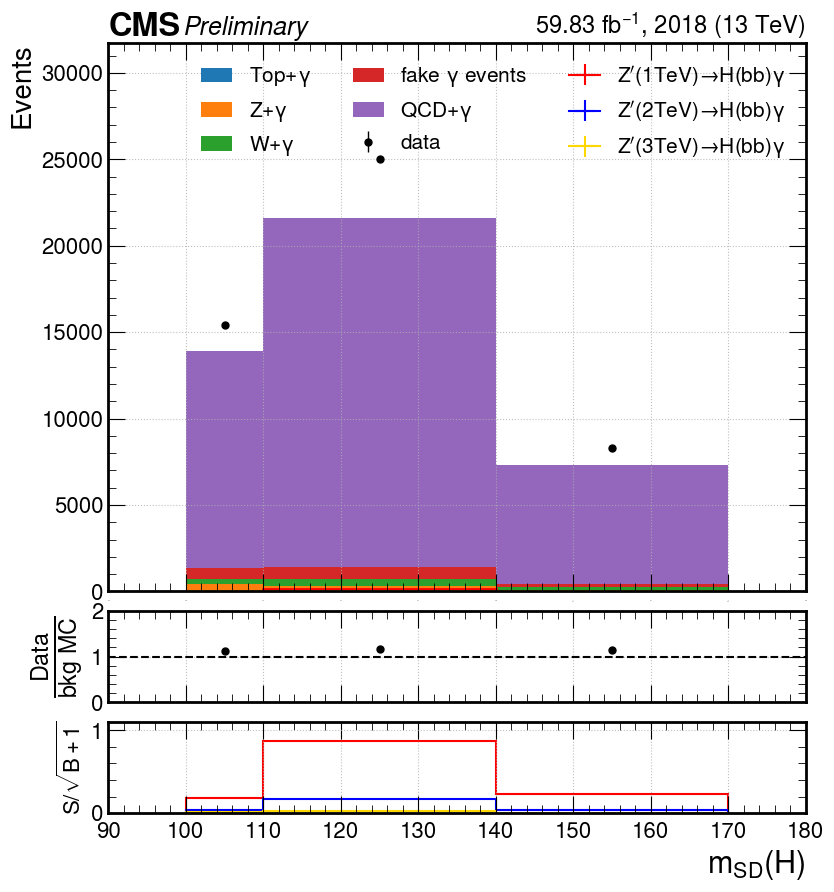

In [75]:
y = '2018'
arrays={
    k: events[y][k]['AK8jet_msoftdrop'][
        #(events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in events[y]
}
_weight = {
    k: weight[y][k][
        #(events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in weight[y]
}
mH_mass_plot(arrays, plot_name='mH_in_3_region', x_name=r'$m_{SD}(H)$', x_max=180, x_min=90, bins=54, weight=_weight, year=y)

# Tagger score study and Categorization

In [22]:
score_all = [
    'AK8jet_inclParTMDV1_probHWqqWev0c',
    'AK8jet_inclParTMDV1_probHWqqWev1c',
    'AK8jet_inclParTMDV1_probHWqqWmv0c',
    'AK8jet_inclParTMDV1_probHWqqWmv1c',
    'AK8jet_inclParTMDV1_probHWqqWq0c',
    'AK8jet_inclParTMDV1_probHWqqWq1c',
    'AK8jet_inclParTMDV1_probHWqqWq2c',
    'AK8jet_inclParTMDV1_probHWqqWqq0c',
    'AK8jet_inclParTMDV1_probHWqqWqq1c',
    'AK8jet_inclParTMDV1_probHWqqWqq2c',
    'AK8jet_inclParTMDV1_probHWqqWtauev0c',
    'AK8jet_inclParTMDV1_probHWqqWtauev1c',
    'AK8jet_inclParTMDV1_probHWqqWtauhv0c',
    'AK8jet_inclParTMDV1_probHWqqWtauhv1c',
    'AK8jet_inclParTMDV1_probHWqqWtaumv0c',
    'AK8jet_inclParTMDV1_probHWqqWtaumv1c',
    'AK8jet_inclParTMDV1_probHbb',
    'AK8jet_inclParTMDV1_probHcc',
    'AK8jet_inclParTMDV1_probHqq',
    'AK8jet_inclParTMDV1_probHss',
    'AK8jet_inclParTMDV1_probHtauhtaue',
    'AK8jet_inclParTMDV1_probHtauhtauh',
    'AK8jet_inclParTMDV1_probHtauhtaum',
    'AK8jet_inclParTMDV1_probQCDb',
    'AK8jet_inclParTMDV1_probQCDbb',
    'AK8jet_inclParTMDV1_probQCDc',
    'AK8jet_inclParTMDV1_probQCDcc',
    'AK8jet_inclParTMDV1_probQCDothers',
    'AK8jet_inclParTMDV1_probTopbWev',
    'AK8jet_inclParTMDV1_probTopbWmv',
    'AK8jet_inclParTMDV1_probTopbWq0c',
    'AK8jet_inclParTMDV1_probTopbWq1c',
    'AK8jet_inclParTMDV1_probTopbWqq0c',
    'AK8jet_inclParTMDV1_probTopbWqq1c',
    'AK8jet_inclParTMDV1_probTopbWtauev',
    'AK8jet_inclParTMDV1_probTopbWtauhv',
    'AK8jet_inclParTMDV1_probTopbWtaumv',
]

score_Higgs = [k for k in score_all if k.startswith('AK8jet_inclParTMDV1_probH')]

score_HWW = [
    'AK8jet_inclParTMDV1_probHWqqWev0c',
    'AK8jet_inclParTMDV1_probHWqqWev1c',
    'AK8jet_inclParTMDV1_probHWqqWmv0c',
    'AK8jet_inclParTMDV1_probHWqqWmv1c',
    'AK8jet_inclParTMDV1_probHWqqWq0c',
    'AK8jet_inclParTMDV1_probHWqqWq1c',
    'AK8jet_inclParTMDV1_probHWqqWq2c',
    'AK8jet_inclParTMDV1_probHWqqWqq0c',
    'AK8jet_inclParTMDV1_probHWqqWqq1c',
    'AK8jet_inclParTMDV1_probHWqqWqq2c',
    'AK8jet_inclParTMDV1_probHWqqWtauev0c',
    'AK8jet_inclParTMDV1_probHWqqWtauev1c',
    'AK8jet_inclParTMDV1_probHWqqWtauhv0c',
    'AK8jet_inclParTMDV1_probHWqqWtauhv1c',
    'AK8jet_inclParTMDV1_probHWqqWtaumv0c',
    'AK8jet_inclParTMDV1_probHWqqWtaumv1c',
]

score_QCD = [
    'AK8jet_inclParTMDV1_probQCDb',
    'AK8jet_inclParTMDV1_probQCDbb',
    'AK8jet_inclParTMDV1_probQCDc',
    'AK8jet_inclParTMDV1_probQCDcc',
    'AK8jet_inclParTMDV1_probQCDothers',
]

In [23]:
def tagger_study_plot(arrays, weight, plot_name: str, x_name: str, cuts=None, year='2018', bins=40, x_min=0, x_max=2000, density=False, overflow=True, underflow=False, fraction_log=False):
    LUMI = {"2016pre": 19.52, "2016post": 16.81, "2017": 41.48, "2018": 59.83,}
    bin_width = (x_max-x_min)/bins
    if cuts:
        arrays = {k: v[cuts[k]] for k, v in arrays.items()}
        
    ## canvas initializing
    # f, ax = plt.subplots()
    f = plt.figure(figsize=(9, 10))
    gs = mpl.gridspec.GridSpec(3, 1, height_ratios=[6, 1, 1], hspace=0.08)
    ax = f.add_subplot(gs[0])
    #ax = plt.gca()
    plt.grid()
    hep.cms.label(data=True, year=year, ax=ax, lumi=LUMI[year], fontsize=18, llabel='Preliminary')
    ## Ratio panel
    ax1 = f.add_subplot(gs[1])
    ax2 = f.add_subplot(gs[2])
    ax1.grid()
    ax2.grid()
    
    ## analyze
    stacked = {'h': {}, 'var': {}}
    individual = {'h': {}, 'var': {}}
    
    for (k,v) in arrays.items():
        hist = bh.Histogram(bh.axis.Regular(bins, x_min, x_max), storage=bh.storage.Weight())
        if 'delta_phi' in plot_name:
            values = np.min([v, 2*np.pi-v], axis=0)
        values = ak.fill_none(v, -999)
        
        if k!='data' and weight is not None:
            hist.fill(values, weight=weight[k])
        else:
            hist.fill(values)
        h, var = flow(hist=hist, overflow=overflow, underflow=underflow)
        
        if k in BKG: 
            stacked['h'][k] = h
            stacked['var'][k] = var
        else:
            individual['h'][k] = h
            individual['var'][k] = var
        
    ## plot
    ax1.plot([x_min,x_max], [1,1], color='black', linestyle='dashed')
    # or you can specify color='blue' in the above function to cover colorlist (you could comment out colorlist too)
    if len(stacked['h'].keys())>0:
        hep.histplot(list(stacked['h'].values()), bins=hist.axes[0].edges, label=list(stacked['h'].keys()), histtype='fill', density=density, stack=True, linewidth=2, ax=ax)
        bkg_h = np.sum(list(stacked['h'].values()), axis=0)
        # we usually don't care error of background MC cuz the stats is very large (relative error is very small compared with signal and data)
    
    combined_significance = {}
    stats_data = {}
    for (k,h) in individual['h'].items():
        if k=='data':
            err = error_bar(h, individual['var'][k], type='data')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, color='black', histtype='errorbar', density=density, stack=False, ax=ax)
            hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
        elif k in SIG_COLOR:  # signal
            err = error_bar(h, individual['var'][k], type='mc')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, histtype='step', density=density, stack=False, linewidth=2, ax=ax, color=SIG_COLOR[k])
            y = h / np.sqrt(individual['h']['data'])
            hep.histplot(y, bins=hist.axes[0].edges, yerr=err/np.sqrt(individual['h']['data']), label=k, histtype='step', density=density, stack=False, ax=ax2, color=SIG_COLOR[k])
            combined_significance[k] = {
                hist.axes[0].edges[i]: np.sqrt(
                    np.sum(h[:i])**2 / (np.sum(individual['h']['data'][:i])+1e-6) + 
                    np.sum(h[i:])**2 / np.sum(individual['h']['data'][i:])
                ) for i in range(len(h))
            }
            stats_data[k] = {
                np.sum(hist.axes[0].edges[i]): np.sum(individual['h']['data'][i:]) for i in range(len(h))
            }


    ## axises
    ax.set_xlim(x_min, x_max)
    # ax.set_xticklabels([])
    ax.set_ylim(1e-3 if not density else 0, ax.get_ylim()[1]*(1e2 if not density else 1.2))
    if not density:
        ax.set_yscale('log')
    # ax.ticklabel_format(useOffset=False, style='scientific')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='x', which='major', labelsize=0)
    # x_major_locator=plt.MultipleLocator(bin_width*8 if variable=='fj_gen_mass' else bin_width*2)
    # y_major_locator=MultipleLocator(1)
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    if density==False:
        ax.set_ylabel('Events', fontsize=20, ha='right', y=1)
    elif density==True:    
        ax.set_ylabel('A.U.', fontsize=20, ha='right', y=1)
    
    ax1.set_xlim(x_min, x_max)
    ax1.set_xticklabels([])
    if fraction_log:
        ax1.set_ylim(1e-1, 1e1)
        ax1.set_yscale('log')
    else:
        ax1.set_ylim(0, 2)
    ax1.set_ylabel(r'$\frac{Data}{bkg\ MC}$', ha='center', fontsize=24)
    #ax1.ticklabel_format(useOffset=False, style='plain')
    ax1.tick_params(axis='both', which='major', labelsize=16)
    
    #ax2.set_yscale('log')
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(0, ax2.get_ylim()[1]*1.2)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    ax2.set_xlabel(x_name, fontsize=22, ha='right', x=1)
    ax2.set_ylabel(r'$\frac{signal}{\sqrt{data}}$', ha='center', fontsize=22)
    ax2.ticklabel_format(useOffset=False, style='plain')
    ax2.tick_params(axis='both', which='major', labelsize=16)

    plt.xticks(size=16)
    plt.yticks(size=16)

    ## title, text and legend
    # plt.title('ROC Curve of HWW4q vs. QCD', fontsize=24,color="black")
    ax.legend(loc="best", ncol=3, frameon=False, fontsize=15)
    # plt.text(0.96*ax.get_xlim()[1], ax.get_ylim()[1]*0.72,"At "+r"$\mathrm{m^{gen}_{H}=}$"+f"{Higgsmass} GeV", fontsize=24, color="black", ha='right')

    ## finalizing
    suffix = '_AU' if density else ''
    if not os.path.exists('./plots/tagger'):
        os.makedirs('./plots/tagger')
    plt.savefig(f"./plots/tagger/{year}_{plot_name}{suffix}.pdf", bbox_inches='tight')
    plt.show()
    
    return combined_significance, stats_data

/tmp/ipykernel_2472998/1468643620.py:62: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_2472998/1468643620.py:63: RuntimeWarning:

divide by zero encountered in divide

/home/dfu/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning:

invalid value encountered in add

/tmp/ipykernel_2472998/1468643620.py:67: RuntimeWarning:

divide by zero encountered in scalar divide

/tmp/ipykernel_2472998/1468643620.py:62: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_2472998/1468643620.py:63: RuntimeWarning:

divide by zero encountered in divide

/home/dfu/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning:

invalid value encountered in add

/tmp/ipykernel_2472998/1468643620.py:67: RuntimeWarning:

divide by zero encountered in scalar divide

/tmp/ipykernel_2472998/1468643620.py:62: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_2472998/1468643620.py:63: RuntimeWarn

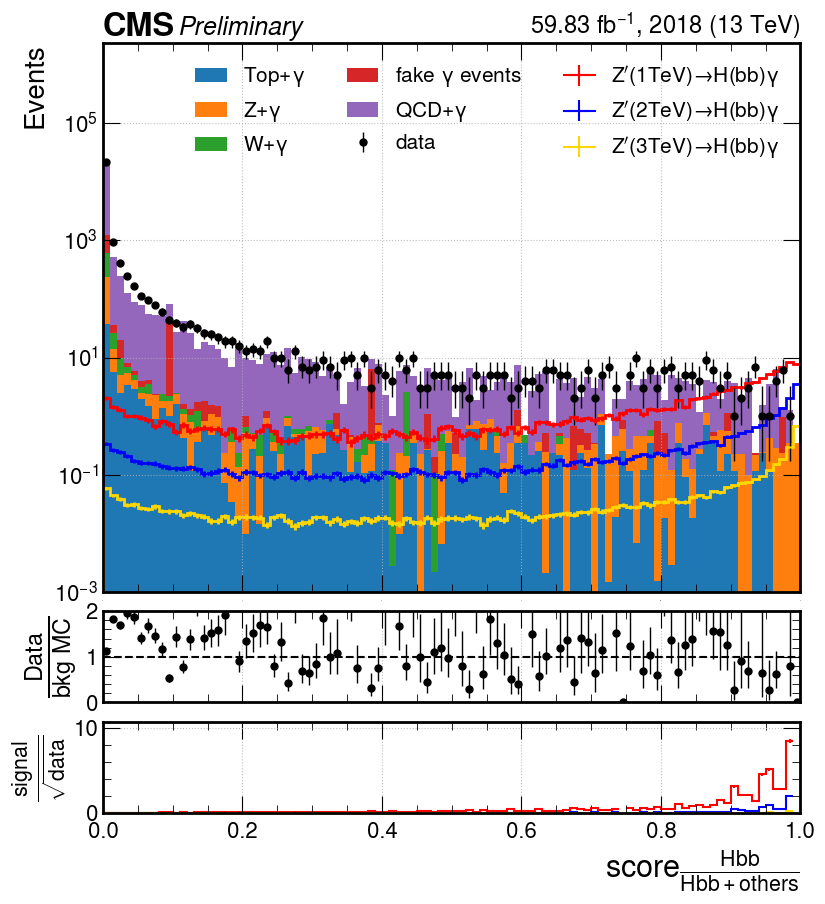

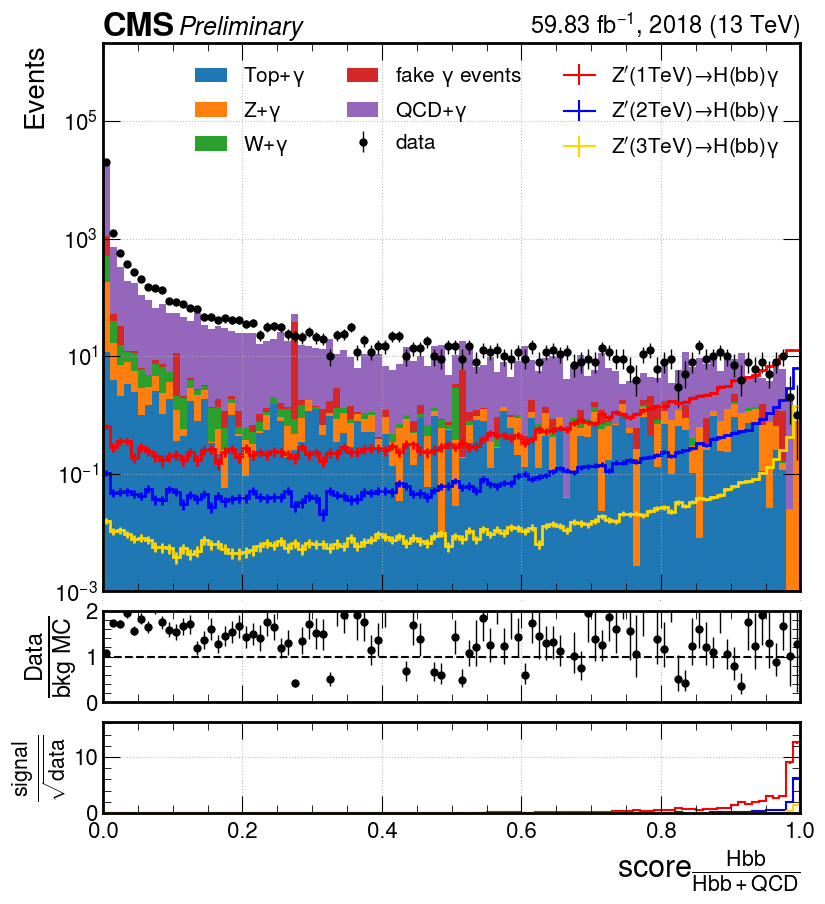

In [24]:
arrays={
    k: getattr(events[y][k], 'AK8jet_inclParTMDV1_probHbb')[
        (events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in events[y]
}
_weight = {
    k: weight[y][k][
        (events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in weight[y]
}
CS_others, stats_others = tagger_study_plot(arrays, plot_name='score(Hbb vs others)', x_name=r'score$\frac{Hbb}{Hbb+others}$', x_max=1, x_min=0, bins=100, weight=_weight, year=y, density=False)

arrays={
    k: (getattr(events[y][k], 'AK8jet_inclParTMDV1_probHbb') / ak.sum([getattr(events[y][k], d) for d in ['AK8jet_inclParTMDV1_probHbb']+score_QCD], axis=0))[
        (events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in events[y]
}
_weight = {
    k: weight[y][k][
        (events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140) &
        (np.abs(events[y][k].photon_eta) < 1.4442) &
        (np.abs(events[y][k].AK8jet_eta) < 2.4) &
        (events[y][k].photon_pt/events[y][k]['photon+jet_mass'] > 0.35)
    ] for k in weight[y]
}
CS_QCD, stats_QCD = tagger_study_plot(arrays, plot_name='score(Hbb vs QCD)', x_name=r'score$\frac{Hbb}{Hbb+QCD}$', x_max=1, x_min=0, bins=100, weight=_weight, year=y, density=False)

In [25]:
a=zip(CS_QCD['$Z^\\mathrm{\\prime}(1TeV)\\to H(bb)\\gamma$'].keys(), CS_QCD['$Z^\\mathrm{\\prime}(1TeV)\\to H(bb)\\gamma$'].values())

In [26]:
for x, cs in sorted(a, key=lambda x: x[1], reverse=True):
    print(x, round(cs, 3), stats_QCD['$Z^\\mathrm{\\prime}(1TeV)\\to H(bb)\\gamma$'][x])

0.98 14.663 3.0
0.99 12.624 1.0
0.95 9.815 26.0
0.97 9.811 13.0
0.91 9.606 52.0
0.93 9.603 40.0
0.94 9.593 34.0
0.9 9.526 59.0
0.96 9.426 21.0
0.92 9.404 48.0
0.89 9.183 69.0
0.88 8.816 81.0
0.87 8.566 91.0
0.86 8.393 100.0
0.85 8.025 115.0
0.82 7.979 131.0
0.84 7.936 123.0
0.83 7.929 128.0
0.81 7.862 140.0
0.8 7.763 148.0
0.79 7.727 154.0
0.78 7.524 167.0
0.77 7.378 178.0
0.76 7.374 182.0
0.75 7.322 188.0
0.74 7.227 197.0
0.73 7.144 206.0
0.72 7.007 218.0
0.71 6.861 232.0
0.7 6.792 240.0
0.69 6.717 249.0
0.68 6.663 257.0
0.67 6.619 264.0
0.66 6.508 276.0
0.65 6.418 287.0
0.64 6.309 300.0
0.63 6.216 312.0
0.62 6.17 320.0
0.61 6.052 335.0
0.6 5.991 344.0
0.59 5.913 356.0
0.58 5.861 365.0
0.57 5.806 375.0
0.56 5.731 388.0
0.55 5.669 400.0
0.54 5.598 413.0
0.53 5.559 421.0
0.52 5.476 436.0
0.51 5.436 445.0
0.5 5.36 460.0
0.49 5.29 475.0
0.48 5.253 484.0
0.47 5.211 494.0
0.46 5.129 512.0
0.45 5.071 526.0
0.44 5.019 540.0
0.43 4.986 550.0
0.42 4.899 572.0
0.41 4.82 594.0
0.4 4.771 609.0
0.3

In [27]:
stats_QCD['$Z^\\mathrm{\\prime}(1TeV)\\to H(bb)\\gamma$'][0.9], stats_QCD['$Z^\\mathrm{\\prime}(1TeV)\\to H(bb)\\gamma$'][0.98]

(59.0, 3.0)

In [28]:
stats_others['$Z^\\mathrm{\\prime}(1TeV)\\to H(bb)\\gamma$'][0.9]

26.0

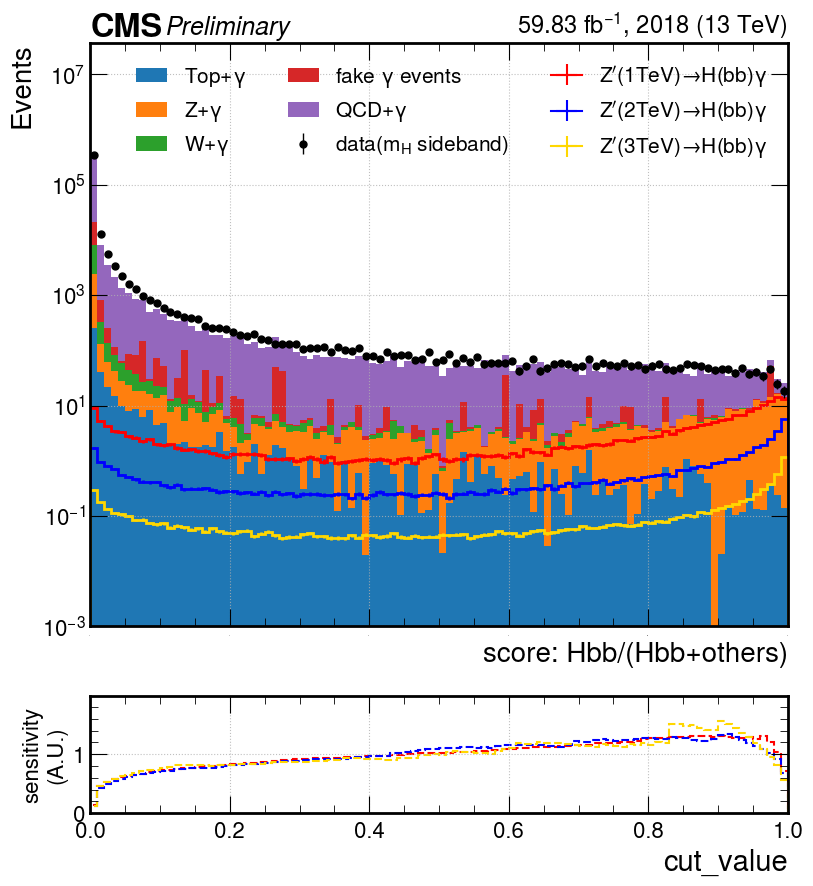

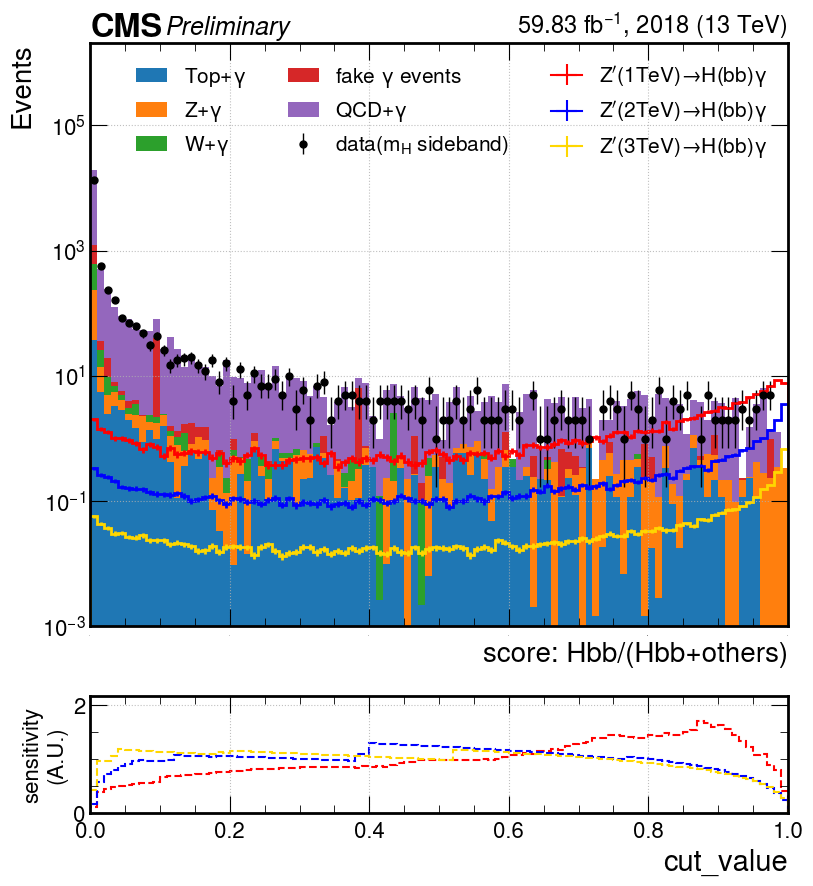

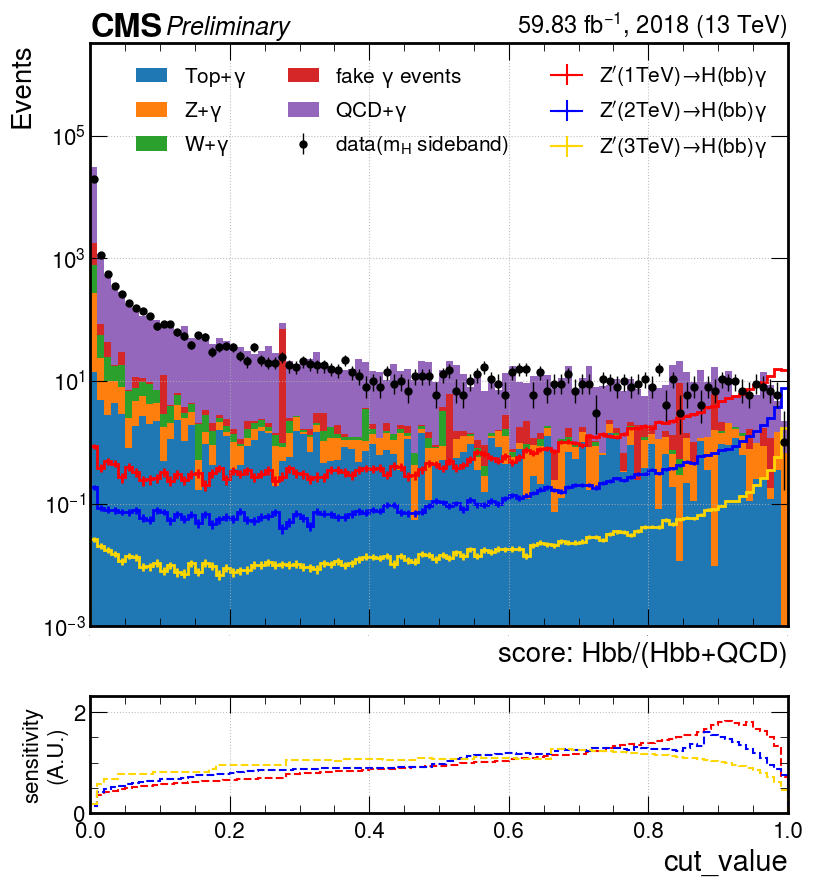

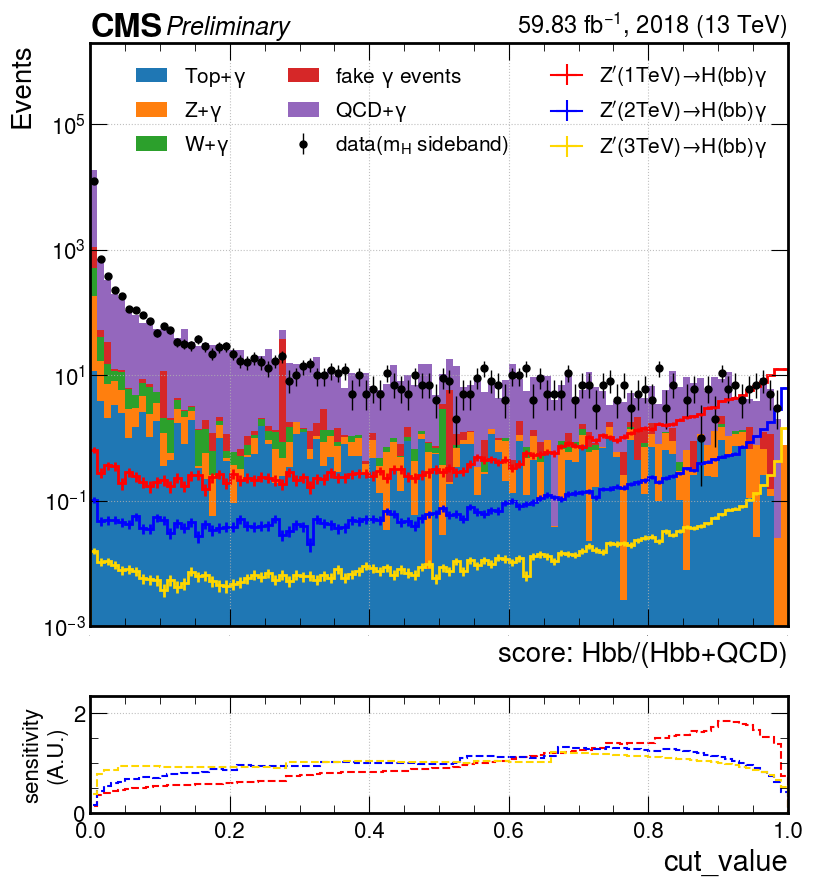

In [29]:
arrays={k: events[y][k].AK8jet_inclParTMDV1_probHbb for k in events[y]}
optimizing_plot(arrays, cuts=None, mode='greater', plot_name='pre_Hbb_score', x_name=r'score: Hbb/(Hbb+others)', x_max=1, x_min=0, bins=100, weight=weight[y], year=y)
optimizing_plot(arrays, cuts=eval(full_cuts), mode='greater', plot_name='Hbb_score', x_name=r'score: Hbb/(Hbb+others)', x_max=1, x_min=0, bins=100, weight=weight[y], year=y)

arrays={
    k: getattr(events[y][k], 'AK8jet_inclParTMDV1_probHbb') / ak.sum([getattr(events[y][k], d) for d in ['AK8jet_inclParTMDV1_probHbb']+score_QCD], axis=0)
    for k in events[y]
}
optimizing_plot(arrays, cuts={
    k: ((events[y][k]['AK8jet_msoftdrop'] > 100) & (events[y][k]['AK8jet_msoftdrop'] < 110) if k=='data' else (events[y][k]['AK8jet_msoftdrop'] > 110) & (events[y][k]['AK8jet_msoftdrop'] < 140))
    for k in arrays
}, mode='greater', plot_name='pre_Hbb_vs_QCD_score', x_name=r'score: Hbb/(Hbb+QCD)', x_max=1, x_min=0, bins=100, weight=weight[y], year=y)
optimizing_plot(arrays, cuts=eval(full_cuts), mode='greater', plot_name='Hbb_vs_QCD_score', x_name=r'score: Hbb/(Hbb+QCD)', x_max=1, x_min=0, bins=100, weight=weight[y], year=y)